# Build a model to predict the China GDP Estimation.

# Objective: -

In China, Gross Domestic Product is divided by three sectors: Primary, Secondary and Tertiary. The Primary Industry includes Farming, Forestry, Animal Husbandry, and Fishery and accounts for around 9 percent of GDP. The Secondary sector, which includes Industry (40 percent of GDP) and Construction (9 percent of GDP) is the most important. The Tertiary sector accounts for the remaining 44 percent of total output and consist of Wholesale and Retail Trades; Transport, Storage, and Post, Financial Intermediation, Real Estate, Hotel and Catering Services and Others.

Beijing set an ambitious target of around 5.5% growth for 2022. But Covid controls and the real estate slump weighed heavily. China’s GDP grew by only 3% last year. On Sunday, the Chinese government is widely expected to announce a GDP growth target of around or above 5% for the year.

The goal of this challenge is to use this data to train a machine learning model to predict the estimate china GDP.

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [6]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [7]:
#loading the dataset
try:
    df = pd.read_csv('F:\ML models\China GDP Estimation\Data\data.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [8]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

2000          2001          2002          2003          2004  \
0           NaN           NaN           NaN           NaN           NaN   
1  1.000000e+02  1.067796e+02  1.306549e+02  1.758518e+02  2.380894e+02   
2  1.391026e+00  1.610082e+00  1.493716e+00  1.669060e+00  1.632855e+00   
3  1.772414e+00  1.602930e+00  1.946866e+00  2.642353e+00  2.873778e+00   
4  2.490000e+11  2.660000e+11  3.260000e+11  4.380000e+11  5.930000e+11   

           2005          2006          2007          2008          2009  ...  \
0           NaN           NaN  3.015080e+01  2.936366e+01  3.193779e+01  ...   
1  3.057559e+02  3.888308e+02  4.897437e+02  5.741075e+02  4.821820e+02  ...   
2  1.720716e+00  1.928404e+00  2.139414e+00  2.519456e+00  2.738001e+00  ...   
3  3.434867e+00  3.839381e+00  4.895892e+00  5.397575e+00  4.042821e+00  ...   
4  7.620000e+11  9.690000e+11  1.220000e+12  1.430000e+12  1.200000e+12  ...   

           2012          2013          2014          2015          2016  \
0  3.084868e+01  3.157436e+01  2.969541e+01  3.042195e+01  3.024264e+01   
1  8.221065e+02  8.864279e+02  9.399136e+02  9.122956e+02  8.417363e+02   
2  3.077146e+00  3.126181e+00  3.407135e+00  3.505981e+00  3.160539e+00   
3  4.553418e+00  4.676851e+00  4.590498e+00  3.457776e+00  3.820314e+00   
4  2.050000e+12  2.210000e+12  2.340000e+12  2.270000e+12  2.100000e+12   

           2017          2018          2019          2020          2021  
0  3.090724e+01  3.154510e+01  3.081720e+01  3.127559e+01  2.995781e+01  
1  9.082338e+02  9.978592e+02  1.002980e+03  1.039402e+03           NaN  
2  3.082330e+00  3.043665e+00  3.320639e+00  3.245054e+00           NaN  
3  4.090316e+00  4.075851e+00  4.323928e+00  4.139877e+00           NaN  
4  2.260000e+12  2.490000e+12  2.500000e+12  2.590000e+12  3.360000e+12  

[5 rows x 22 columns]

# Dataset: -

Attribute Information:
1. 2021: GDP of 2021

**GDP of previous years:**

1.  2000
2.  2001
3.  2002
4.  2003
5.  2004
6.  2005
7.  2006
8.  2007
9.  2008
10. 2009
11. 2010
12. 2011
13. 2012
14. 2013
15. 2014
16. 2015
17. 2016
18. 2017
19. 2018
20. 2019
21. 2020

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [9]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 1147 rows and 22 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "2021" column which is continuous and shows the excepted china gdp in 2021.

In [10]:
df['2021'].value_counts()

9.900000e+01    3
6.000000e+00    3
3.550000e+12    2
4.390000e+13    2
6.504820e+09    2
               ..
9.771014e+08    1
6.240003e+00    1
7.434911e+00    1
7.788113e+00    1
1.210000e+12    1
Name: 2021, Length: 402, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [11]:
df.shape

(1147, 22)

#### The df.shape method shows the shape of the dataset. 

We can identify that their are 1147 rows and 22 columns.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    848 non-null    float64
 1   2001    798 non-null    float64
 2   2002    823 non-null    float64
 3   2003    802 non-null    float64
 4   2004    788 non-null    float64
 5   2005    856 non-null    float64
 6   2006    857 non-null    float64
 7   2007    876 non-null    float64
 8   2008    891 non-null    float64
 9   2009    866 non-null    float64
 10  2010    946 non-null    float64
 11  2011    887 non-null    float64
 12  2012    882 non-null    float64
 13  2013    910 non-null    float64
 14  2014    930 non-null    float64
 15  2015    920 non-null    float64
 16  2016    908 non-null    float64
 17  2017    906 non-null    float64
 18  2018    910 non-null    float64
 19  2019    862 non-null    float64
 20  2020    718 non-null    float64
 21  2021    418 non-null    float64
dtype

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [13]:
df.iloc[1]

2000     100.000000
2001     106.779613
2002     130.654928
2003     175.851816
2004     238.089429
2005     305.755950
2006     388.830793
2007     489.743703
2008     574.107455
2009     482.181996
2010     633.119986
2011     761.780958
2012     822.106475
2013     886.427932
2014     939.913645
2015     912.295598
2016     841.736255
2017     908.233850
2018     997.859175
2019    1002.980301
2020    1039.402054
2021            NaN
Name: 1, dtype: float64

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [14]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [15]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  0
There names are as follows:  []


In [16]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [17]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  0
There names are as follows:  []


In [18]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [19]:
print("Total number of numerical columns are ", len(float64_lst))
print("There names are as follows: ", float64_lst)

Total number of numerical columns are  22
There names are as follows:  ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


## Step 2 Insights: -

1) We have total 22 features and all are float type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

##### All the columns shows the GDP of different years.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [20]:
df.describe()

2000          2001          2002          2003          2004  \
count  8.480000e+02  7.980000e+02  8.230000e+02  8.020000e+02  7.880000e+02   
mean   3.099808e+11  3.638318e+11  3.930431e+11  4.601087e+11  5.475127e+11   
std    1.575812e+12  1.789790e+12  1.967696e+12  2.255225e+12  2.587085e+12   
min   -1.210000e+11 -1.590000e+11 -1.240000e+11 -8.457843e+10 -6.014467e+10   
25%    7.101984e+00  8.277076e+00  7.156938e+00  7.937336e+00  8.150464e+00   
50%    5.628005e+01  5.911526e+01  4.445057e+01  5.447159e+01  5.881234e+01   
75%    9.900000e+06  2.177500e+07  6.355000e+06  1.406920e+07  5.234850e+07   
max    1.730000e+13  1.870000e+13  2.040000e+13  2.240000e+13  2.470000e+13   

               2005          2006          2007          2008          2009  \
count  8.560000e+02  8.570000e+02  8.760000e+02  8.910000e+02  8.660000e+02   
mean   5.810408e+11  6.778633e+11  8.082403e+11  9.077508e+11  1.045704e+12   
std    2.819561e+12  3.266597e+12  3.838339e+12  4.363238e+12  5.072114e+12   
min   -4.050000e+11 -1.000000e+11 -1.390000e+11 -1.150000e+11 -8.716707e+10   
25%    7.978610e+00  8.643139e+00  8.616017e+00  8.565839e+00  7.968229e+00   
50%    5.243375e+01  5.599118e+01  5.550257e+01  5.350000e+01  5.443418e+01   
75%    1.395500e+07  1.499571e+07  3.327784e+07  1.497363e+07  1.030500e+07   
max    2.830000e+13  3.460000e+13  4.030000e+13  4.750000e+13  6.100000e+13   

       ...          2012          2013          2014          2015  \
count  ...  8.820000e+02  9.100000e+02  9.300000e+02  9.200000e+02   
mean   ...  1.513430e+12  1.613578e+12  1.731923e+12  1.917144e+12   
std    ...  7.500660e+12  8.189493e+12  8.921376e+12  9.971653e+12   
min    ... -1.760000e+11 -4.820000e+11 -2.980000e+11 -3.430000e+11   
25%    ...  7.425680e+00  6.408242e+00  6.892320e+00  6.732499e+00   
50%    ...  5.116506e+01  4.684120e+01  4.916747e+01  5.023933e+01   
75%    ...  7.240824e+06  2.704094e+06  2.933005e+06  2.456385e+06   
max    ...  9.740000e+13  1.110000e+14  1.230000e+14  1.390000e+14   

               2016          2017          2018          2019          2020  \
count  9.080000e+02  9.060000e+02  9.100000e+02  8.620000e+02  7.180000e+02   
mean   2.053211e+12  2.257665e+12  2.441673e+12  2.761748e+12  3.456720e+12   
std    1.106504e+13  1.216853e+13  1.323740e+13  1.469762e+13  1.710652e+13   
min   -4.440000e+11 -2.070000e+11 -4.040000e+11 -2.760000e+11 -1.130000e+12   
25%    6.843089e+00  6.769100e+00  6.204738e+00  6.408118e+00  5.550750e+00   
50%    5.086884e+01  5.164658e+01  4.663992e+01  5.395746e+01  6.885716e+01   
75%    2.394423e+06  2.185346e+06  1.651715e+06  6.332964e+06  3.012264e+08   
max    1.600000e+14  1.780000e+14  1.970000e+14  2.170000e+14  2.440000e+14   

               2021  
count  4.180000e+02  
mean   4.913748e+12  
std    1.724152e+13  
min   -1.040000e+12  
25%    8.113819e+00  
50%    8.218554e+01  
75%    4.966942e+10  
max    1.140000e+14  

[8 rows x 22 columns]

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

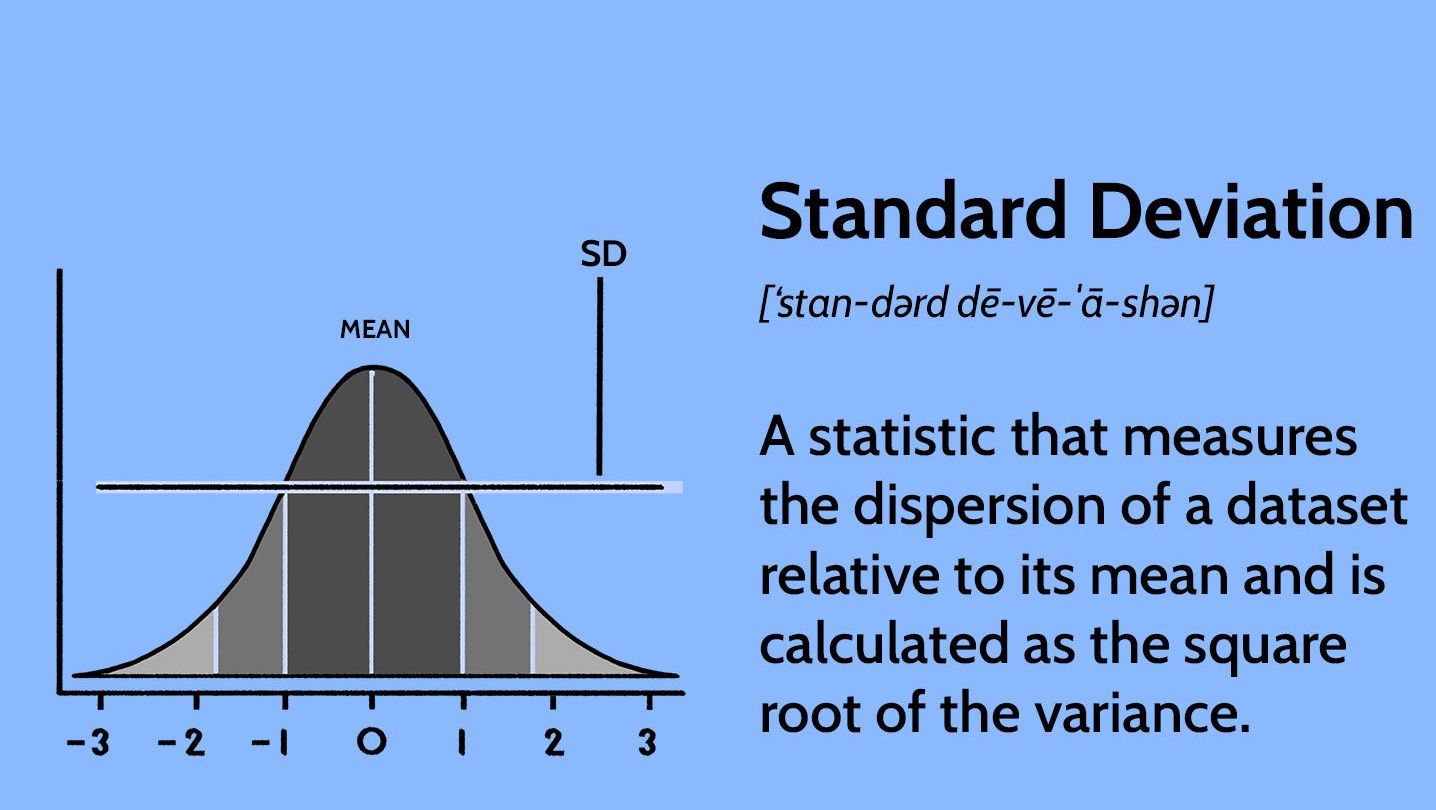

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [21]:
df.std()

2000    1.575812e+12
2001    1.789790e+12
2002    1.967696e+12
2003    2.255225e+12
2004    2.587085e+12
2005    2.819561e+12
2006    3.266597e+12
2007    3.838339e+12
2008    4.363238e+12
2009    5.072114e+12
2010    5.641567e+12
2011    6.719934e+12
2012    7.500660e+12
2013    8.189493e+12
2014    8.921376e+12
2015    9.971653e+12
2016    1.106504e+13
2017    1.216853e+13
2018    1.323740e+13
2019    1.469762e+13
2020    1.710652e+13
2021    1.724152e+13
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [22]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [23]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
std_cal(df,float64_lst)

normal_value  zero_value
0            22           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

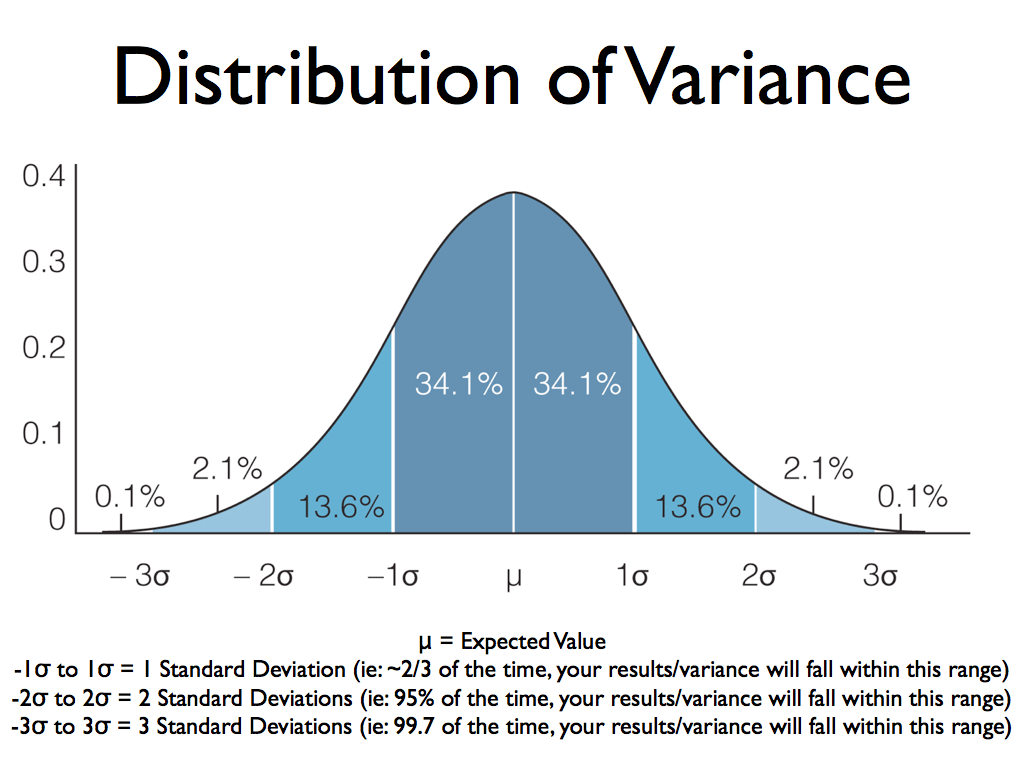

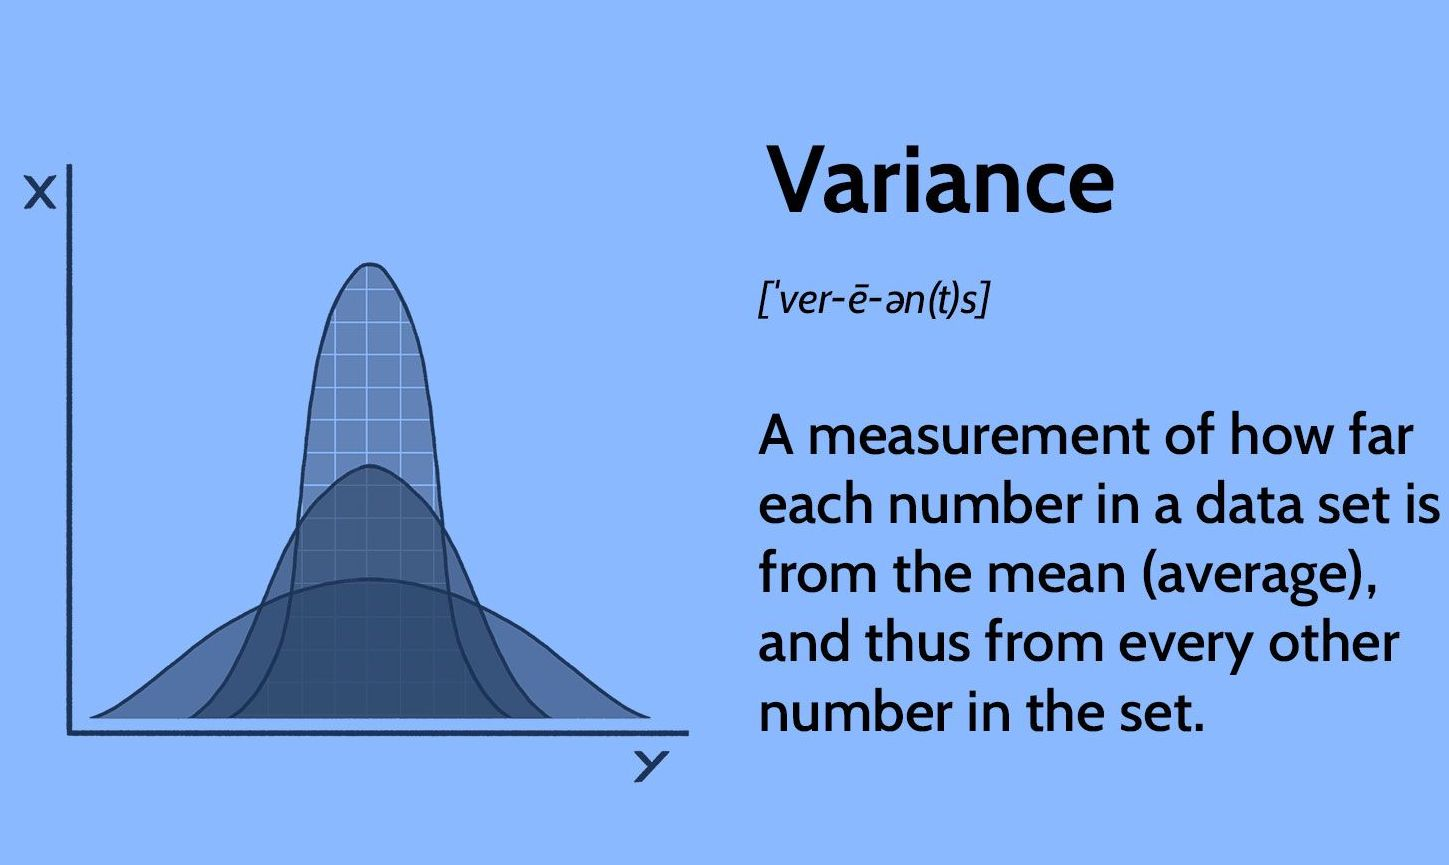

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [24]:
df.var()

2000    2.483183e+24
2001    3.203349e+24
2002    3.871828e+24
2003    5.086040e+24
2004    6.693010e+24
2005    7.949923e+24
2006    1.067066e+25
2007    1.473284e+25
2008    1.903785e+25
2009    2.572634e+25
2010    3.182728e+25
2011    4.515752e+25
2012    5.625990e+25
2013    6.706780e+25
2014    7.959096e+25
2015    9.943387e+25
2016    1.224352e+26
2017    1.480730e+26
2018    1.752289e+26
2019    2.160202e+26
2020    2.926330e+26
2021    2.972700e+26
dtype: float64

#### We can also understand the Variance using the below function.

In [25]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [26]:
var_cal(df, float64_lst)

normal_value  zero_value
0            22           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

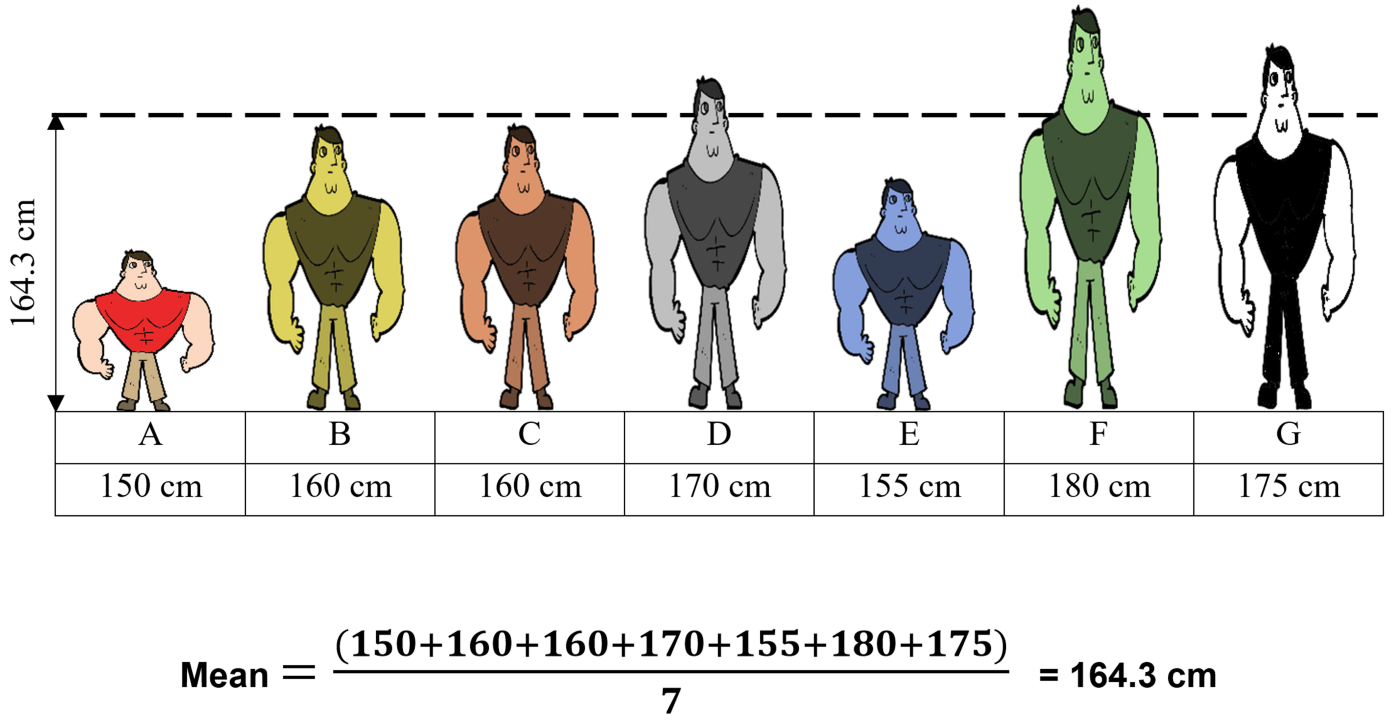

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [30]:
df.mean()

2000    3.099808e+11
2001    3.638318e+11
2002    3.930431e+11
2003    4.601087e+11
2004    5.475127e+11
2005    5.810408e+11
2006    6.778633e+11
2007    8.082403e+11
2008    9.077508e+11
2009    1.045704e+12
2010    1.112190e+12
2011    1.366392e+12
2012    1.513430e+12
2013    1.613578e+12
2014    1.731923e+12
2015    1.917144e+12
2016    2.053211e+12
2017    2.257665e+12
2018    2.441673e+12
2019    2.761748e+12
2020    3.456720e+12
2021    4.913748e+12
dtype: float64

#### We can also understand the mean using the below function. 

In [310]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [311]:
mean_cal(df, float64_lst)

normal_value  zero_value
0            22           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
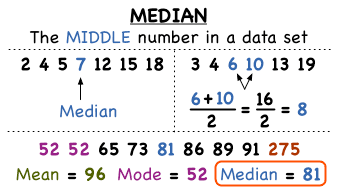

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.

In [312]:
df.median()

2000    56.280055
2001    59.115259
2002    44.450568
2003    54.471594
2004    58.812338
2005    52.433750
2006    55.991184
2007    55.502575
2008    53.500000
2009    54.434185
2010    51.256158
2011    54.055000
2012    51.165057
2013    46.841200
2014    49.167473
2015    50.239331
2016    50.868845
2017    51.646583
2018    46.639925
2019    53.957457
2020    68.857160
2021    82.185542
dtype: float64

####  We can also understand the median using the below function. 

In [313]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [314]:
median_cal(df, float64_lst)

normal_value  zero_value
0            22           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
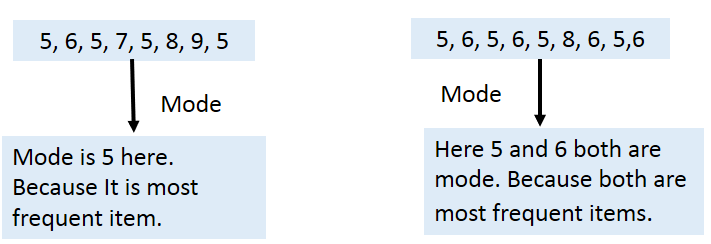
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [315]:
df.mode()

2000          2001   2002          2003   2004  2005  2006  2007  2008  \
0  100.0  2.230000e+01  100.0  1.370000e+13    0.0   0.0   0.0   0.0   0.0   
1    NaN  1.000000e+02    NaN           NaN    6.0   NaN   NaN   NaN   NaN   
2    NaN  2.200000e+11    NaN           NaN   70.0   NaN   NaN   NaN   NaN   
3    NaN  2.440000e+11    NaN           NaN  100.0   NaN   NaN   NaN   NaN   

   2009  ...  2012  2013          2014   2015   2016   2017   2018   2019  \
0   0.0  ...   0.0   1.9  0.000000e+00  100.0  100.0    0.0  100.0  100.0   
1   NaN  ...   3.0   NaN  1.000000e+02    NaN    NaN  100.0    NaN    NaN   
2   NaN  ...   6.0   NaN  6.440000e+13    NaN    NaN    NaN    NaN    NaN   
3   NaN  ...   NaN   NaN           NaN    NaN    NaN    NaN    NaN    NaN   

    2020  2021  
0    0.0   6.0  
1  100.0  99.0  
2    NaN   NaN  
3    NaN   NaN  

[4 rows x 22 columns]

In [316]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [317]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0            11          11             0

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


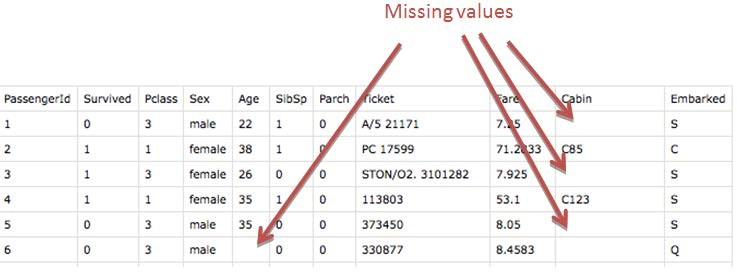

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [318]:
df.isnull().sum()

2000    299
2001    349
2002    324
2003    345
2004    359
2005    291
2006    290
2007    271
2008    256
2009    281
2010    201
2011    260
2012    265
2013    237
2014    217
2015    227
2016    239
2017    241
2018    237
2019    285
2020    429
2021    729
dtype: int64

As we notice that there are some null values in our dataset.

2. **Nan Values**

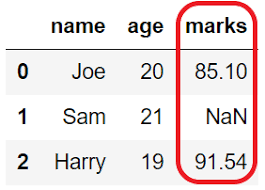

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [319]:
df.isna().sum()

2000    299
2001    349
2002    324
2003    345
2004    359
2005    291
2006    290
2007    271
2008    256
2009    281
2010    201
2011    260
2012    265
2013    237
2014    217
2015    227
2016    239
2017    241
2018    237
2019    285
2020    429
2021    729
dtype: int64

As we notice that there are some nan values in our dataset. So we replace null value by the overall average of GDP of all years.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)" or to replace null and nan values use the method "df.fillna(value,inplace=True)". 

In [320]:
s=df.mean().sum()
t=len(df.columns.tolist())
a=s/t

we replace the null values with the overall mean to dataframe.

In [321]:
df.fillna(a,inplace=True)

In [322]:
df.isnull().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
dtype: int64

# Count of unique occurences of every value in all categorical value



In [323]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

# Skewness 

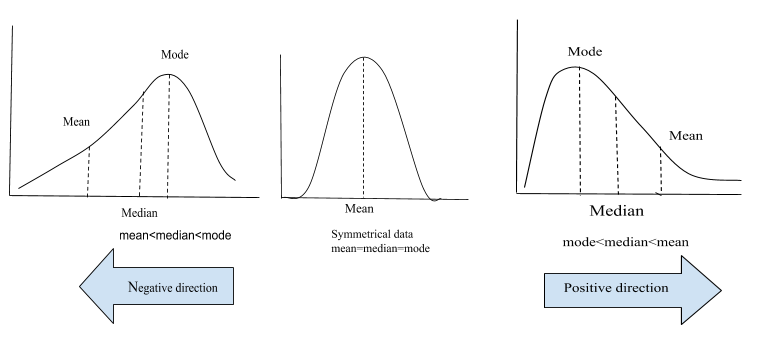

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [324]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [325]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [326]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0    2000          6.1359  positive (+ve) skewed
1    2001          6.2789  positive (+ve) skewed
2    2002          6.7065  positive (+ve) skewed
3    2003          6.9915  positive (+ve) skewed
4    2004          7.0585  positive (+ve) skewed
5    2005          7.2766  positive (+ve) skewed
6    2006          7.4733  positive (+ve) skewed
7    2007          7.4404  positive (+ve) skewed
8    2008          7.5084  positive (+ve) skewed
9    2009          7.9791  positive (+ve) skewed
10   2010          8.1182  positive (+ve) skewed
11   2011          8.2077  positive (+ve) skewed
12   2012          8.4585  positive (+ve) skewed
13   2013          8.6955  positive (+ve) skewed
14   2014          8.9091  positive (+ve) skewed
15   2015          9.3940  positive (+ve) skewed
16   2016         10.0853  positive (+ve) skewed
17   2017         10.1131  positive (+ve) skewed
18   2018         10.1135  positive (+ve) skewed
19   2019         10.3118  positive (+ve) skewed
20   2020         11.0344  positive (+ve) skewed
21   2021          8.0593  positive (+ve) skewed

In [327]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                     22                   0                      0

We notice with the above results that we have following details:
1. 22 columns are positive skewed

### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Why china GDP prediction is important?

GDP is important because it gives information about the size of the economy and how an economy is performing. The growth rate of real GDP is often used as an indicator of the general health of the economy. In broad terms, an increase in real GDP is interpreted as a sign that the economy is doing well. When real GDP is growing strongly, employment is likely to be increasing as companies hire more workers for their factories and people have more money in their pockets. When GDP is shrinking, as it did in many countries during the recent global economic crisis, employment often declines. In some cases, GDP may be growing, but not fast enough to create a sufficient number of jobs for those seeking them. But real GDP growth does move in cycles over time. Economies are sometimes in periods of boom, and sometimes in periods of slow growth or even recession

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Scatter Plot to show the relation between variables

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

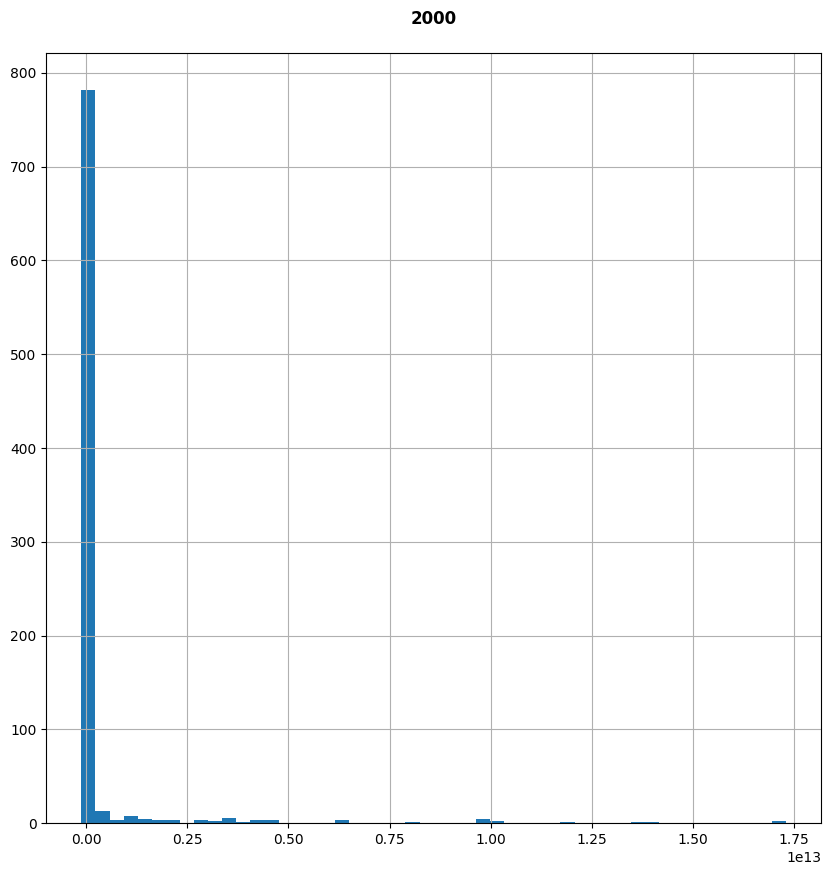

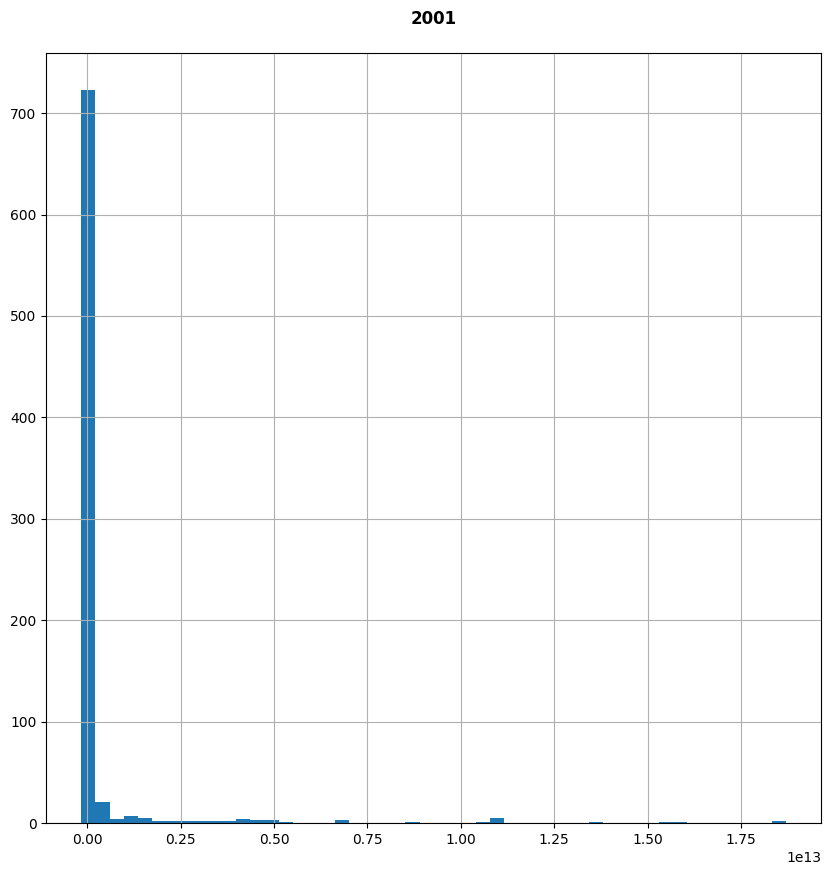

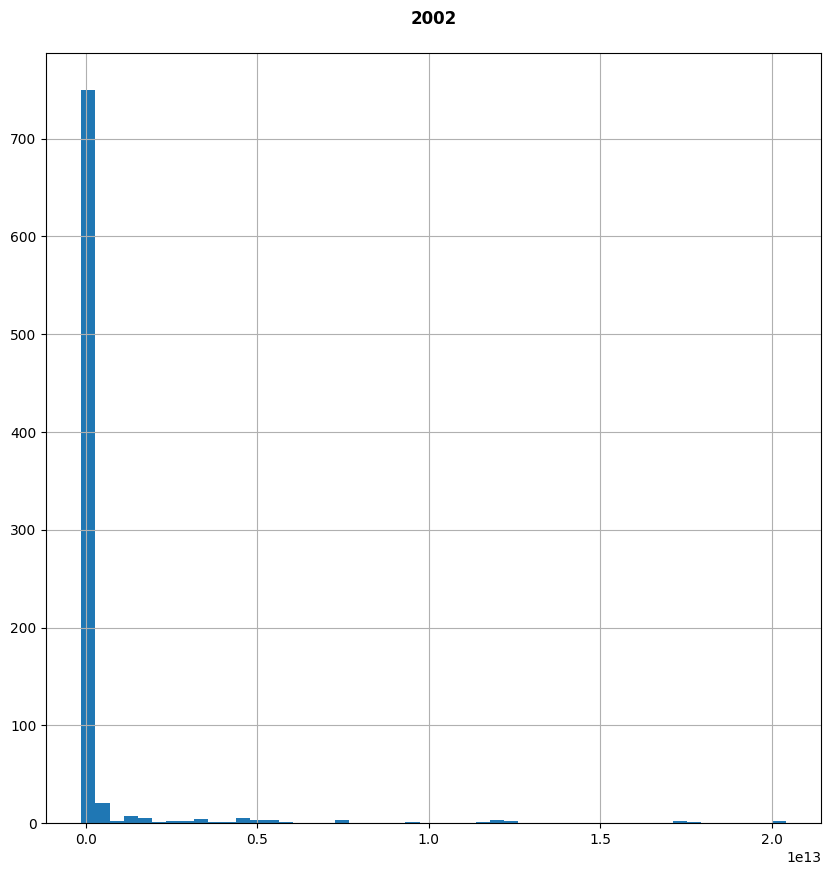

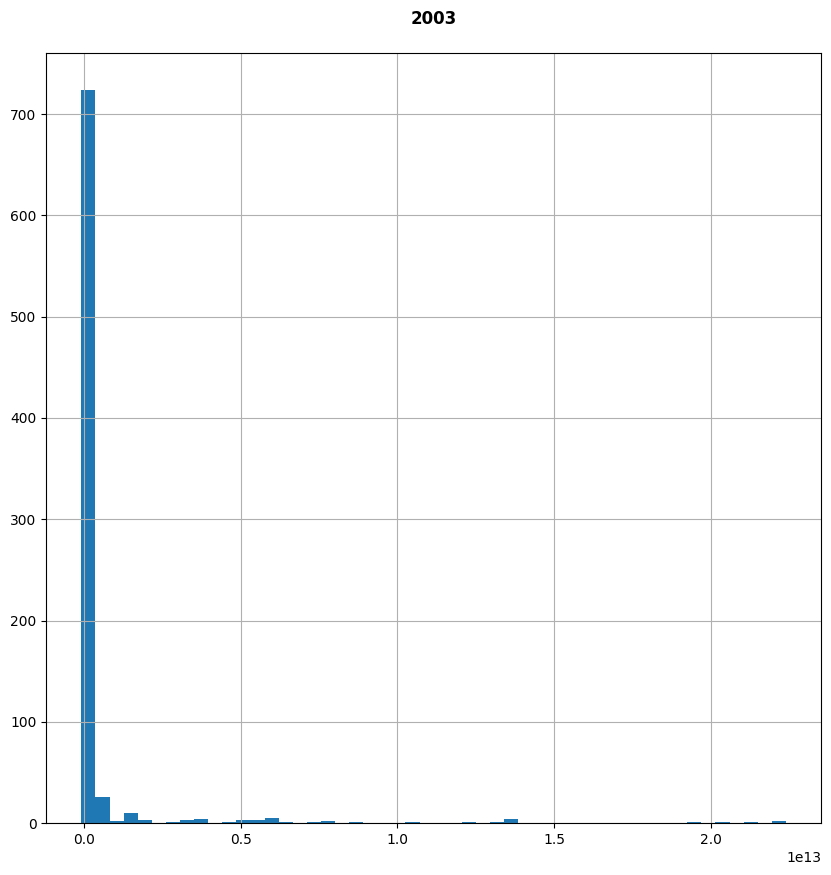

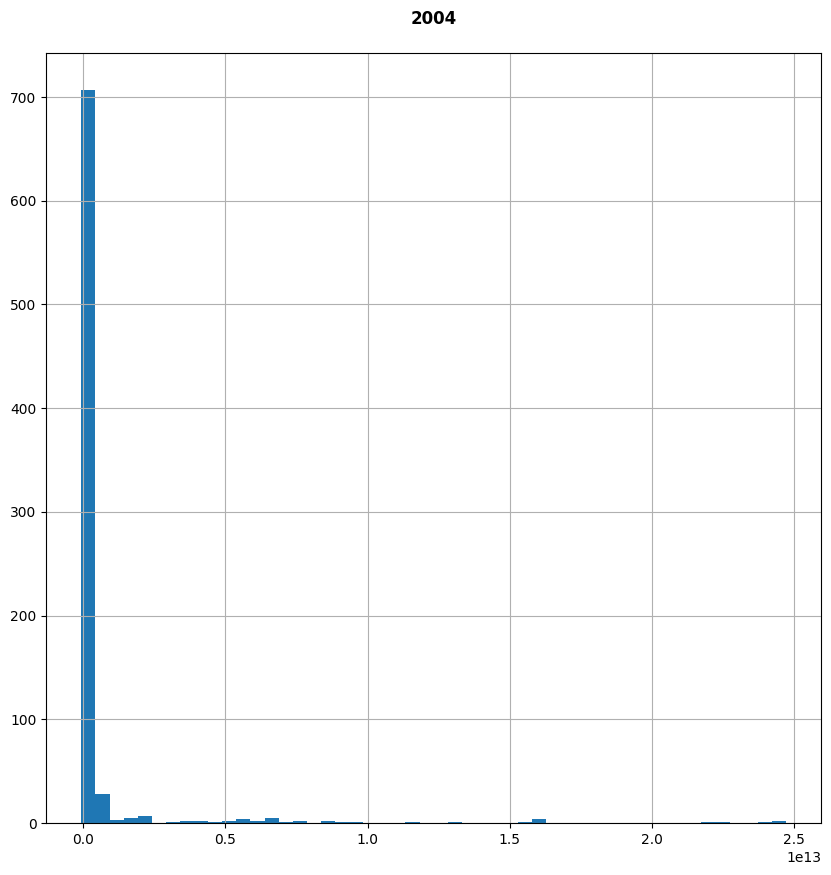

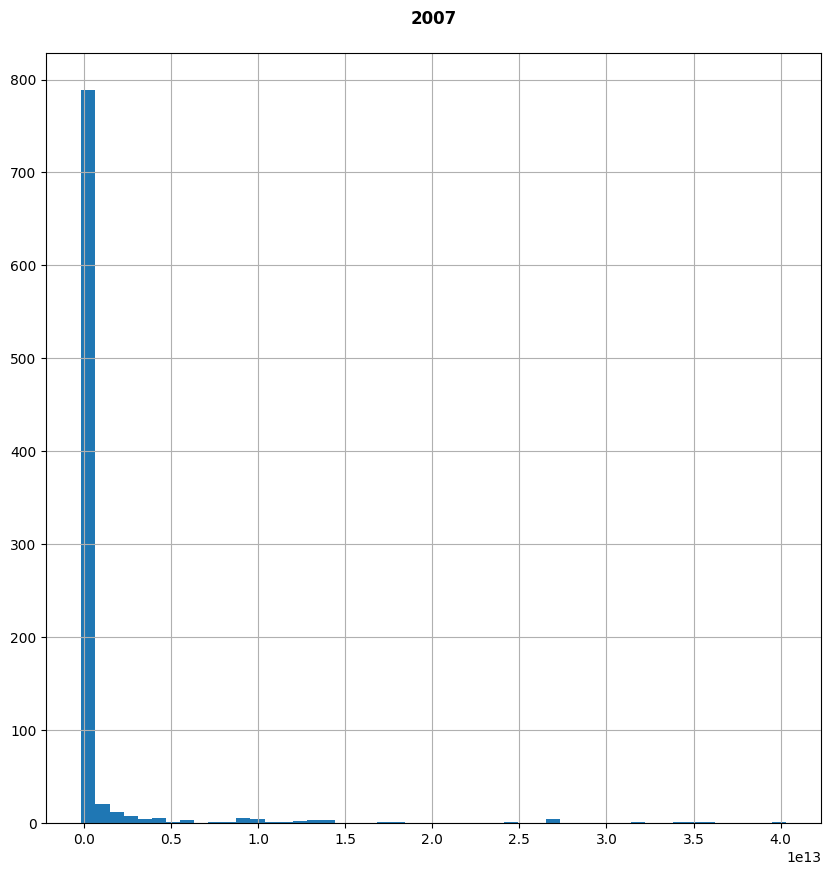

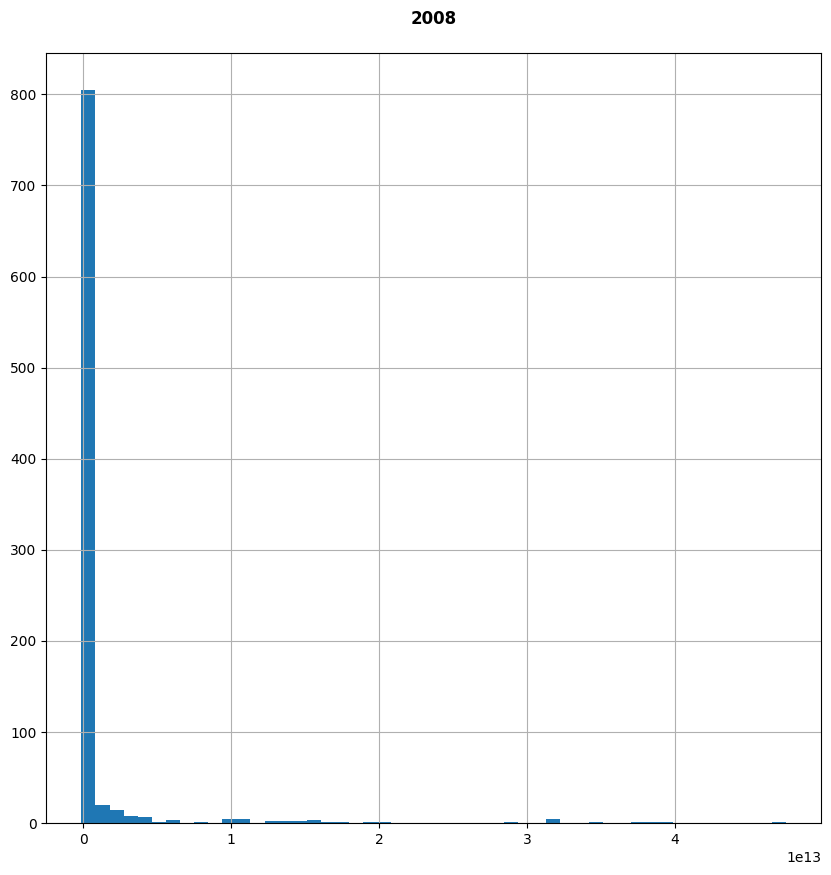

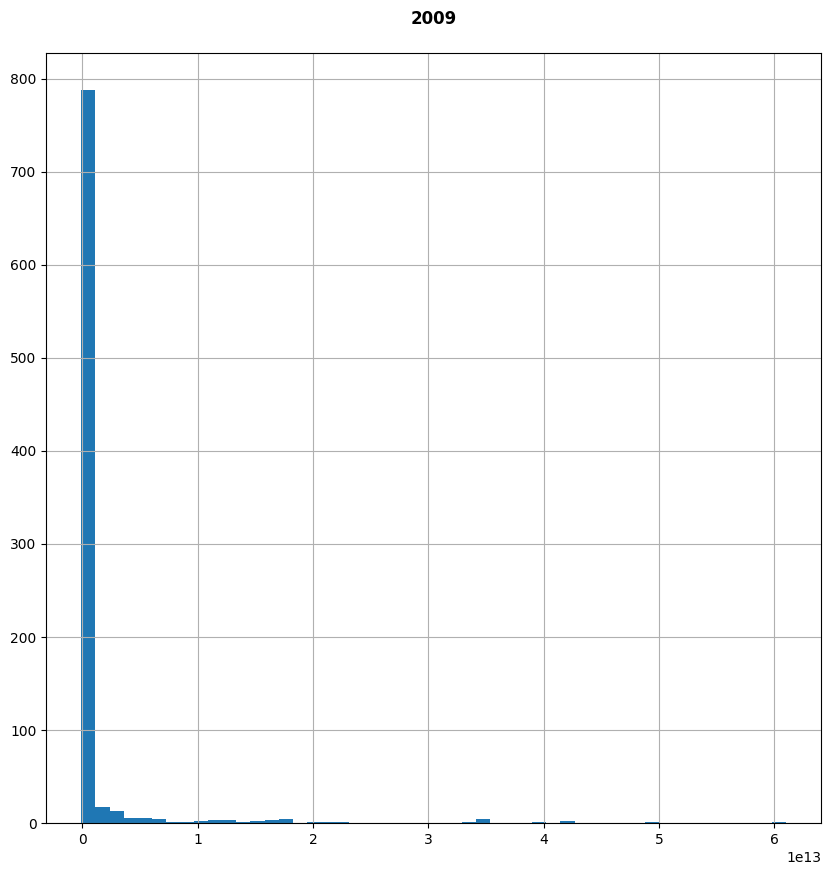

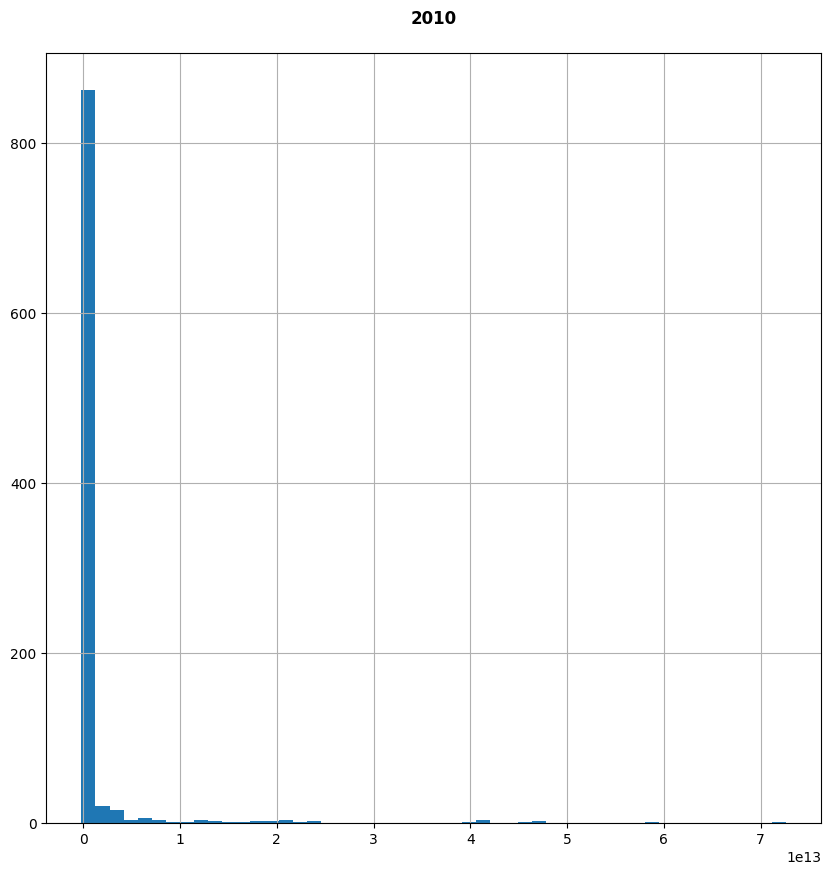

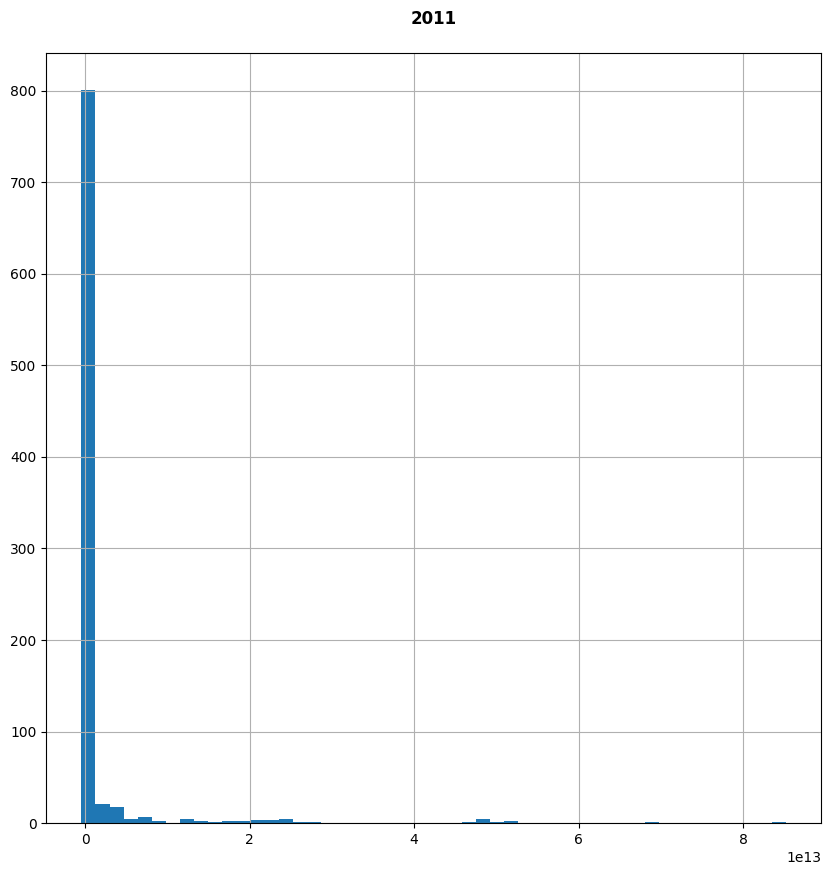

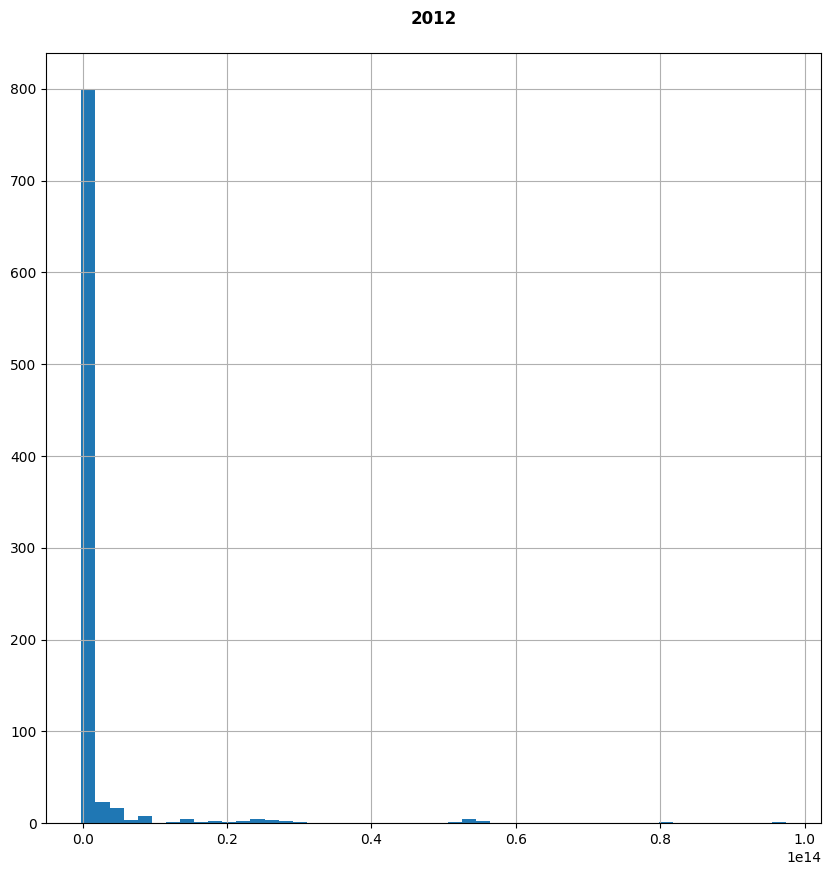

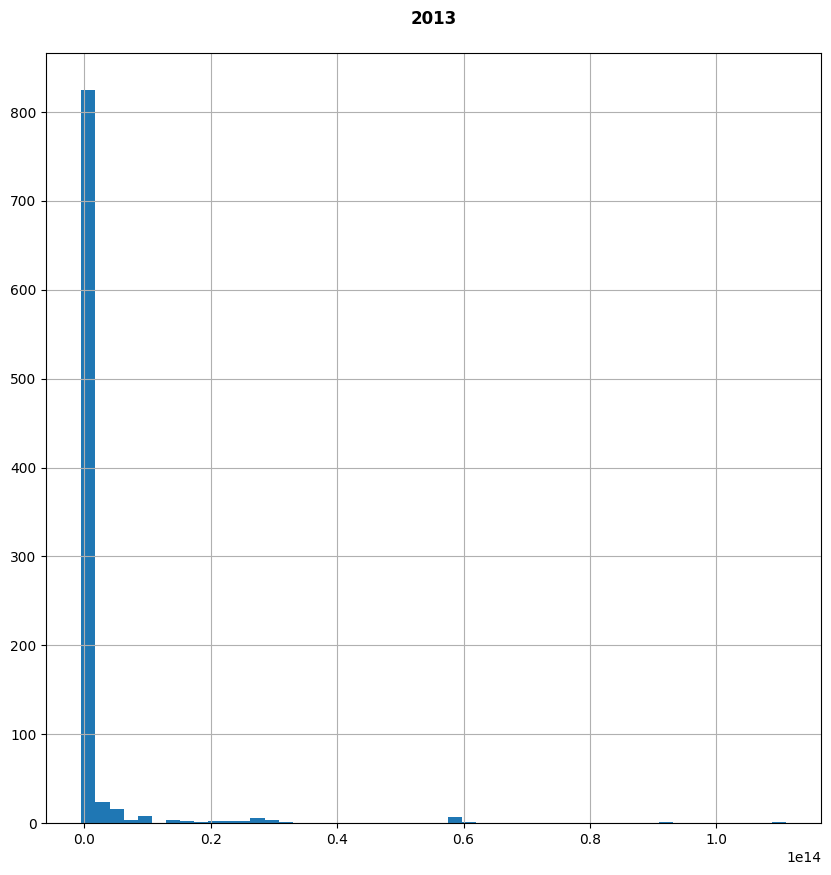

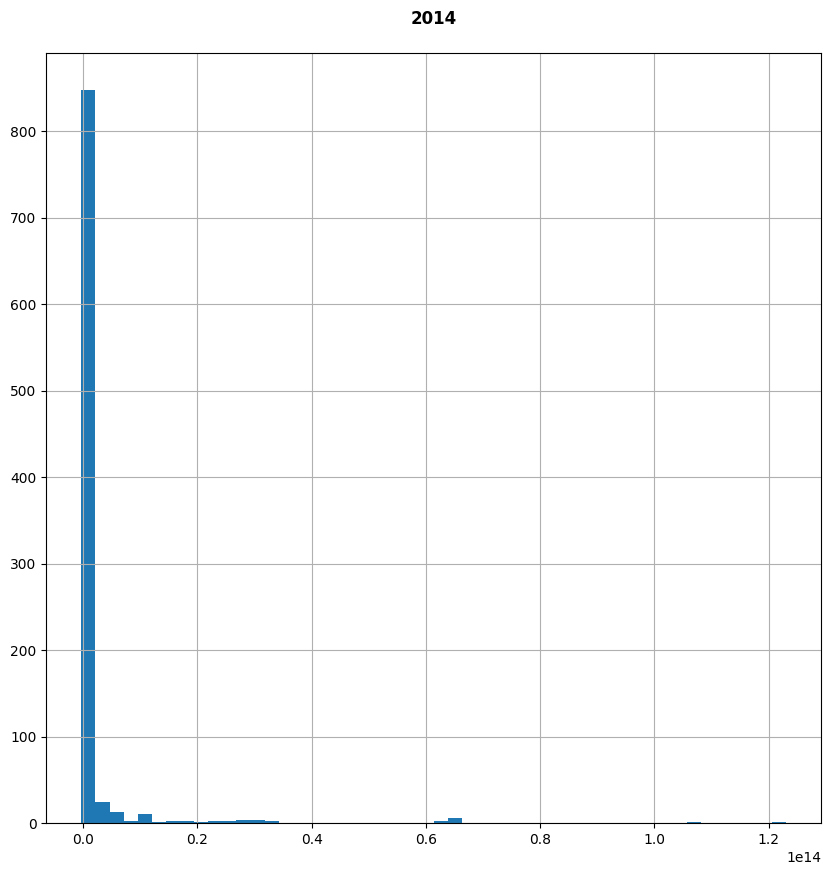

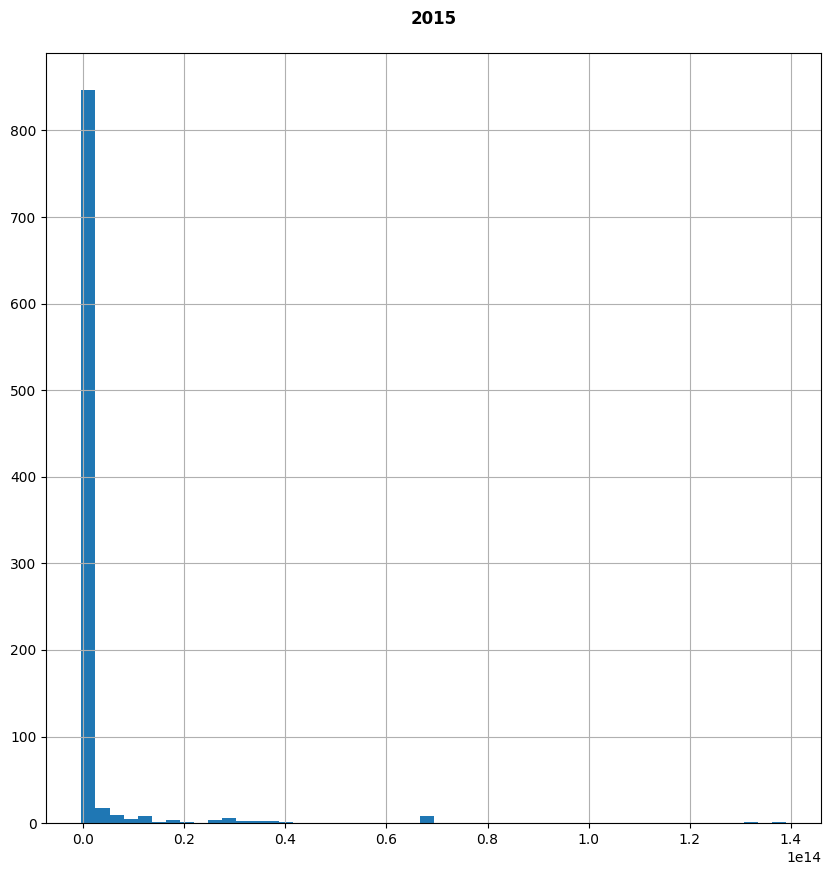

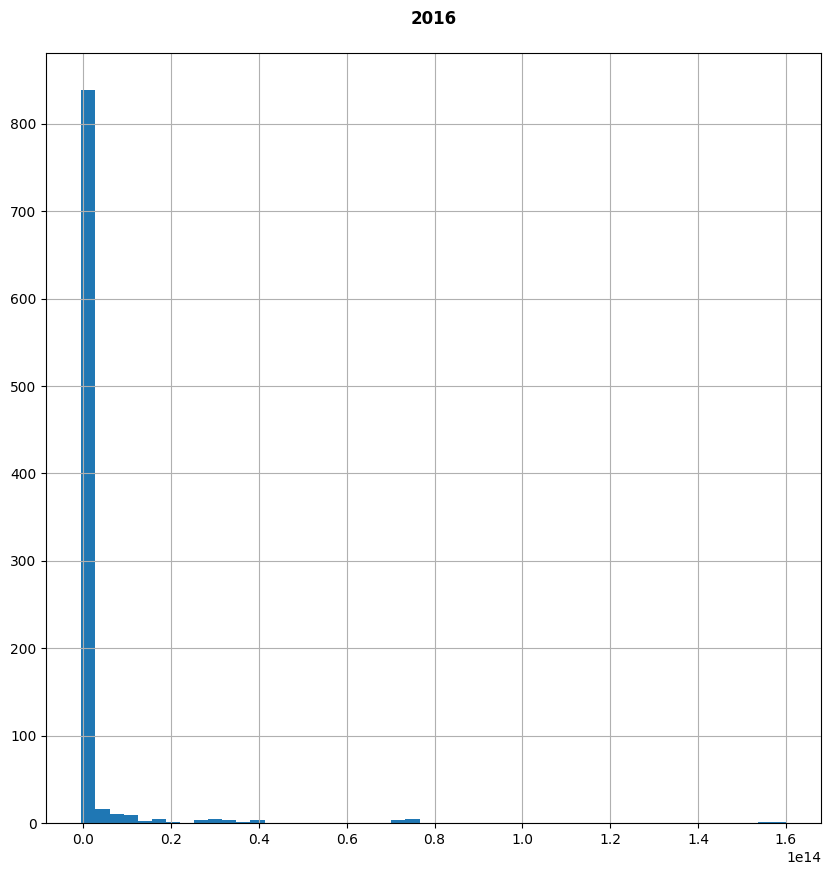

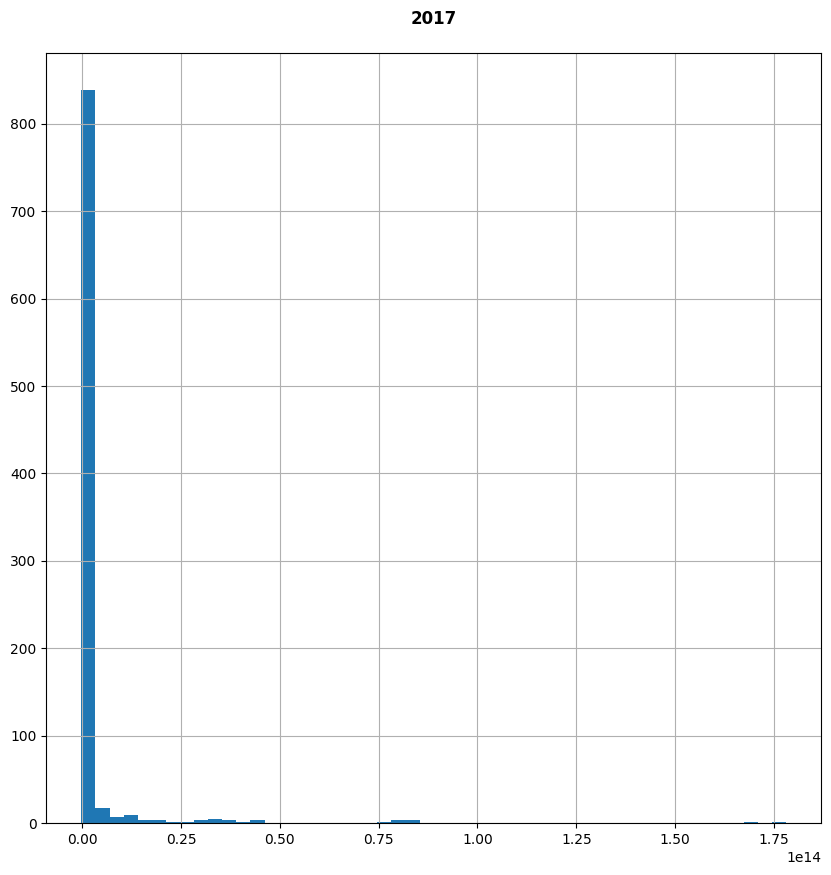

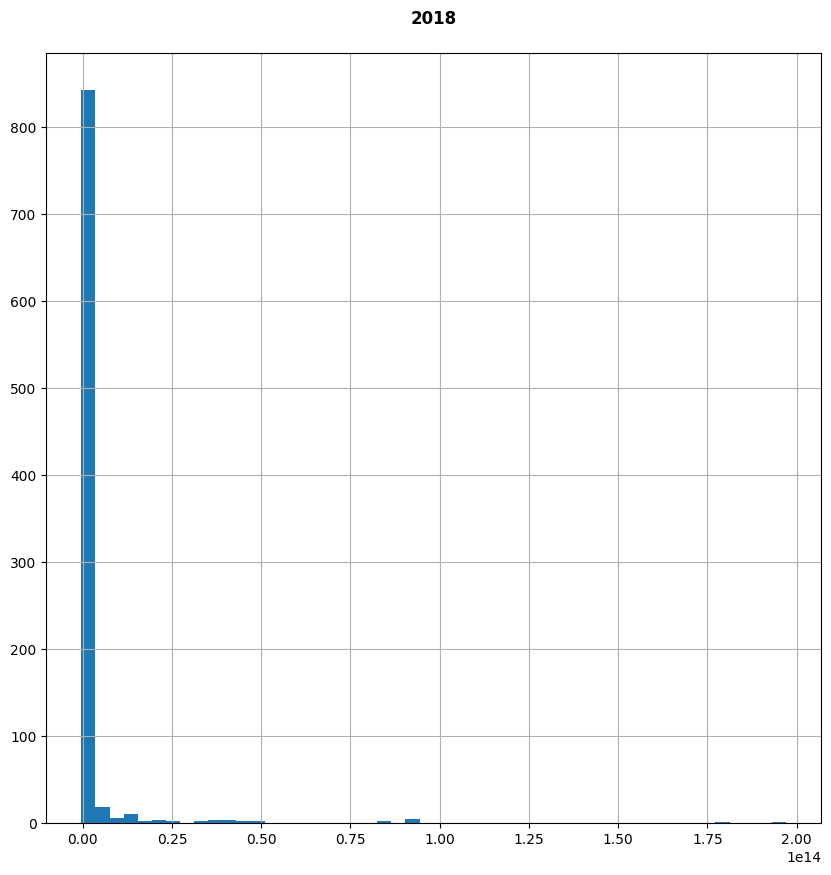

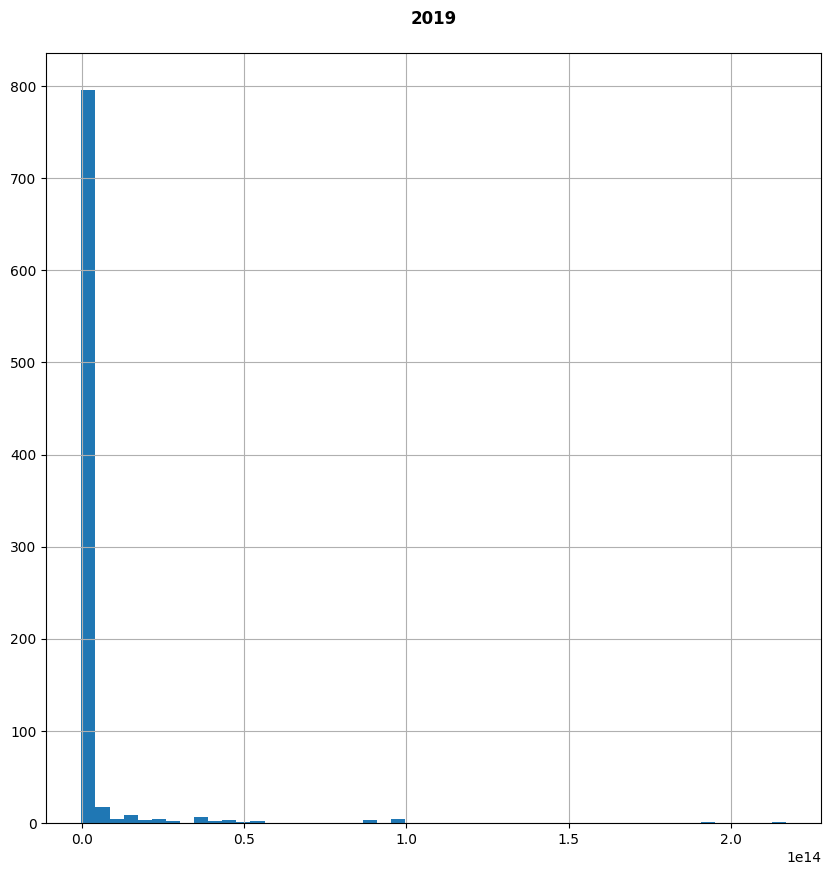

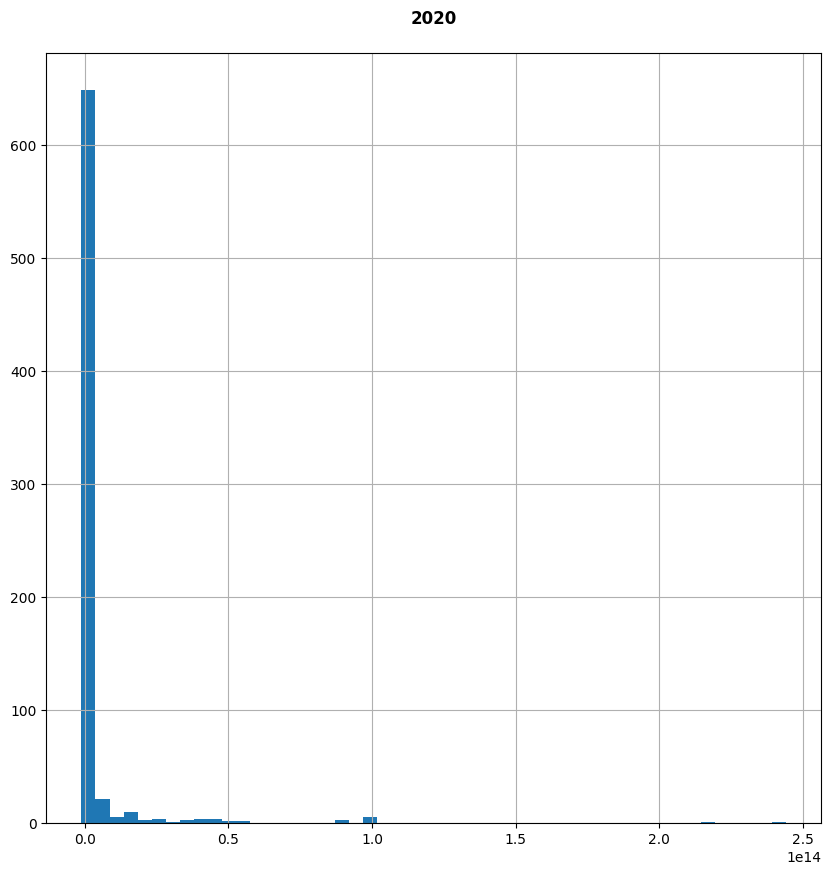

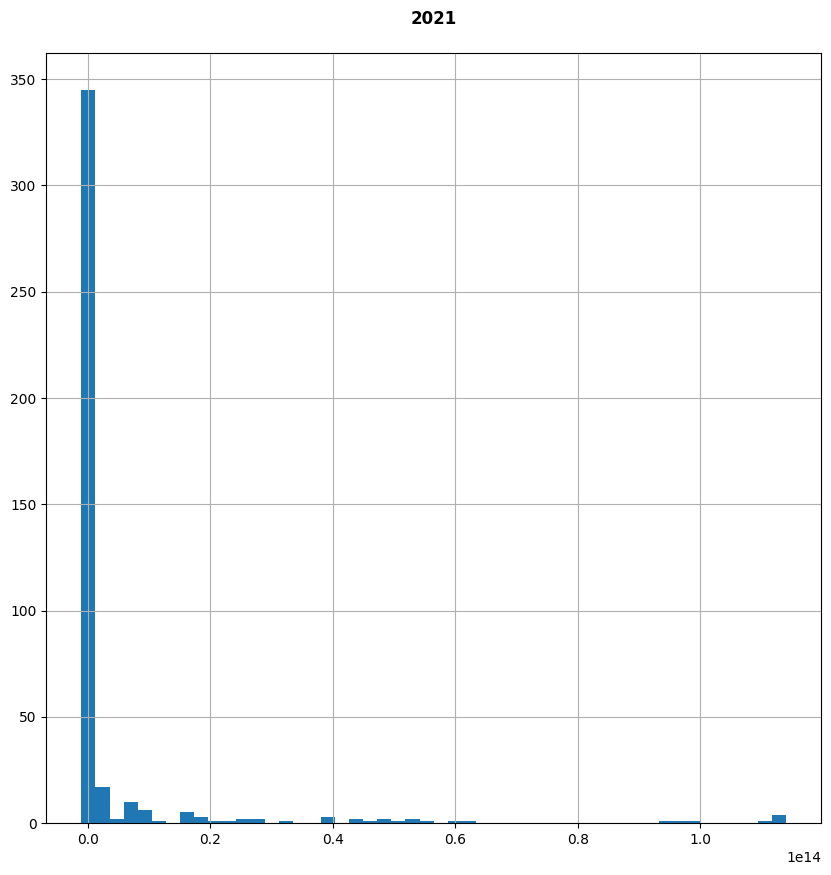

In [31]:
# Distribution in attributes
%matplotlib inline
for i in df.columns:
    df[i].hist(bins=50, figsize=(10,10))
    plt.title(i+"\n",fontweight ="bold")
    plt.show()
    print("   =======================================================================================================\n")


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### From the above histogram we observe that the china GDP is above 800 from 2010 to 2018.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

In [329]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 22 columns are positive skewed.
2. 1 column is added here i.e 2021 which is our target variable ~ which is also +ve skewed. In that case we'll need to cube root transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [330]:
#+ve skewed 
df['2021'].skew()

8.05929384926432

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



In [331]:
#correlation plot
sns.set(rc = {'figure.figsize':(15,15)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against 2021 . As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [332]:
print (corr['2021'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------------------------')
print (corr['2021'].sort_values(ascending=False)[-5:]) #last 5 values`

2021    1.000000
2008    0.845227
2007    0.837429
2006    0.825094
2005    0.821808
2009    0.813363
2011    0.812387
2010    0.811999
2004    0.809099
2012    0.802112
2013    0.791025
2003    0.787156
2002    0.781040
2014    0.780462
2001    0.776434
Name: 2021, dtype: float64 

----------------------------------------
2018    0.736423
2017    0.733195
2016    0.730789
2019    0.727580
2020    0.696640
Name: 2021, dtype: float64


Here we see that the 2008 feature is 84% correlated with the target variable.

In [333]:
corr

2000      2001      2002      2003      2004      2005      2006  \
2000  1.000000  0.956539  0.961649  0.953180  0.947976  0.933475  0.917394   
2001  0.956539  1.000000  0.975214  0.982920  0.971446  0.943167  0.948762   
2002  0.961649  0.975214  1.000000  0.980264  0.975411  0.963347  0.951934   
2003  0.953180  0.982920  0.980264  1.000000  0.988355  0.967858  0.972736   
2004  0.947976  0.971446  0.975411  0.988355  1.000000  0.982873  0.981053   
2005  0.933475  0.943167  0.963347  0.967858  0.982873  1.000000  0.984894   
2006  0.917394  0.948762  0.951934  0.972736  0.981053  0.984894  1.000000   
2007  0.904869  0.932117  0.941609  0.960280  0.971383  0.978670  0.994030   
2008  0.894212  0.918684  0.934249  0.950751  0.965483  0.979483  0.990669   
2009  0.888495  0.913156  0.927461  0.948517  0.961608  0.973020  0.987943   
2010  0.876747  0.889302  0.912277  0.930244  0.946985  0.966617  0.976567   
2011  0.866501  0.888496  0.909019  0.929516  0.946696  0.962955  0.975843   
2012  0.857677  0.877399  0.899927  0.920860  0.939179  0.955609  0.969048   
2013  0.849294  0.866990  0.893823  0.913304  0.931095  0.949135  0.962375   
2014  0.843140  0.863546  0.888760  0.910653  0.928187  0.944315  0.958956   
2015  0.830809  0.846998  0.873811  0.896065  0.911734  0.928258  0.942575   
2016  0.823010  0.842623  0.871959  0.894286  0.908974  0.924176  0.938799   
2017  0.819209  0.838363  0.867593  0.890431  0.905260  0.920811  0.935164   
2018  0.815770  0.834152  0.863738  0.887164  0.902271  0.917847  0.932080   
2019  0.813057  0.831153  0.861205  0.883938  0.899285  0.914608  0.927900   
2020  0.799499  0.816564  0.846870  0.871158  0.885378  0.899837  0.914685   
2021  0.769468  0.776434  0.781040  0.787156  0.809099  0.821808  0.825094   

          2007      2008      2009  ...      2012      2013      2014  \
2000  0.904869  0.894212  0.888495  ...  0.857677  0.849294  0.843140   
2001  0.932117  0.918684  0.913156  ...  0.877399  0.866990  0.863546   
2002  0.941609  0.934249  0.927461  ...  0.899927  0.893823  0.888760   
2003  0.960280  0.950751  0.948517  ...  0.920860  0.913304  0.910653   
2004  0.971383  0.965483  0.961608  ...  0.939179  0.931095  0.928187   
2005  0.978670  0.979483  0.973020  ...  0.955609  0.949135  0.944315   
2006  0.994030  0.990669  0.987943  ...  0.969048  0.962375  0.958956   
2007  1.000000  0.993889  0.992477  ...  0.976759  0.971154  0.968507   
2008  0.993889  1.000000  0.994535  ...  0.983461  0.978615  0.974878   
2009  0.992477  0.994535  1.000000  ...  0.990628  0.988012  0.986151   
2010  0.984615  0.989818  0.994835  ...  0.994265  0.992083  0.990836   
2011  0.982917  0.989372  0.994813  ...  0.997297  0.995698  0.994761   
2012  0.976759  0.983461  0.990628  ...  1.000000  0.997382  0.996125   
2013  0.971154  0.978615  0.988012  ...  0.997382  1.000000  0.997772   
2014  0.968507  0.974878  0.986151  ...  0.996125  0.997772  1.000000   
2015  0.955041  0.958991  0.975811  ...  0.985144  0.989164  0.993417   
2016  0.948206  0.952916  0.970550  ...  0.984789  0.988790  0.993451   
2017  0.944203  0.950237  0.967812  ...  0.983272  0.987667  0.992453   
2018  0.941393  0.947721  0.964838  ...  0.982093  0.986158  0.991028   
2019  0.937205  0.943513  0.961763  ...  0.979399  0.984055  0.989226   
2020  0.924855  0.929670  0.951869  ...  0.970195  0.975593  0.982009   
2021  0.837429  0.845227  0.813363  ...  0.802112  0.791025  0.780462   

          2015      2016      2017      2018      2019      2020      2021  
2000  0.830809  0.823010  0.819209  0.815770  0.813057  0.799499  0.769468  
2001  0.846998  0.842623  0.838363  0.834152  0.831153  0.816564  0.776434  
2002  0.873811  0.871959  0.867593  0.863738  0.861205  0.846870  0.781040  
2003  0.896065  0.894286  0.890431  0.887164  0.883938  0.871158  0.787156  
2004  0.911734  0.908974  0.905260  0.902271  0.899285  0.885378  0.809099  
2005  0.928258  0.924176  0.920811  0.917847  0.914608  0.899837  0.82180

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

We will drop some columns which have correlation close to zero. 

# 4. Boxplot

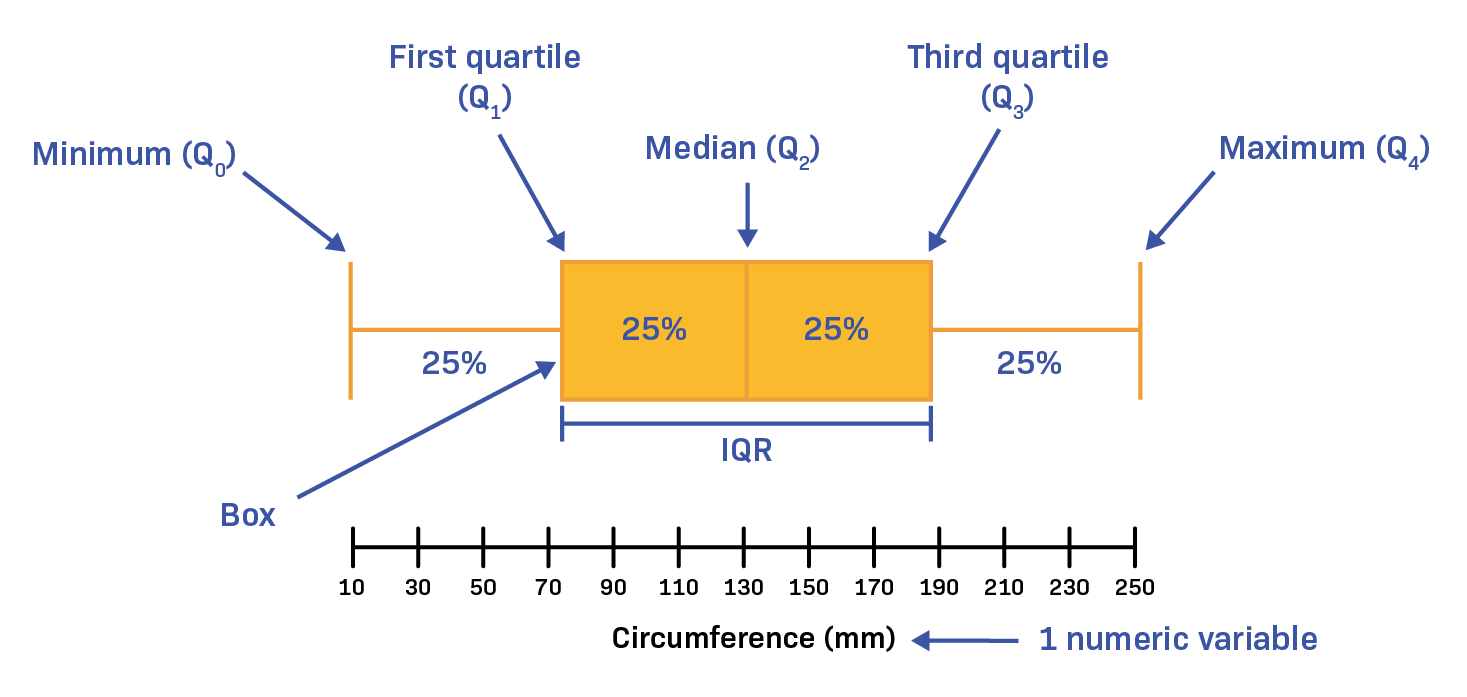

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [32]:
features = df.columns.tolist()
features.remove('2021')

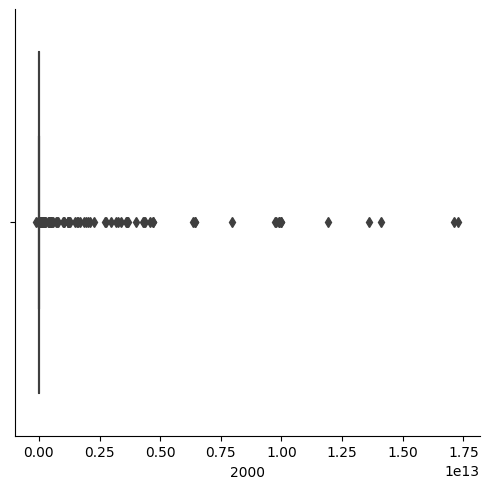

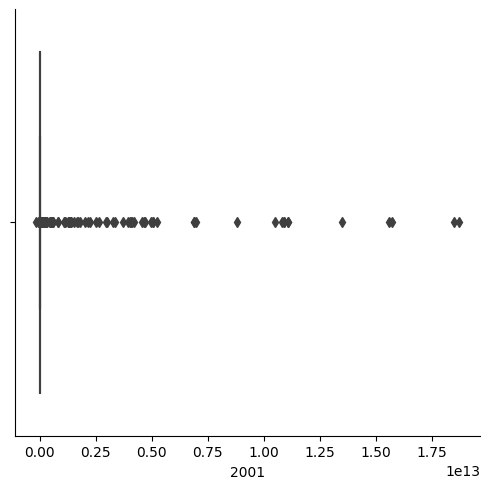

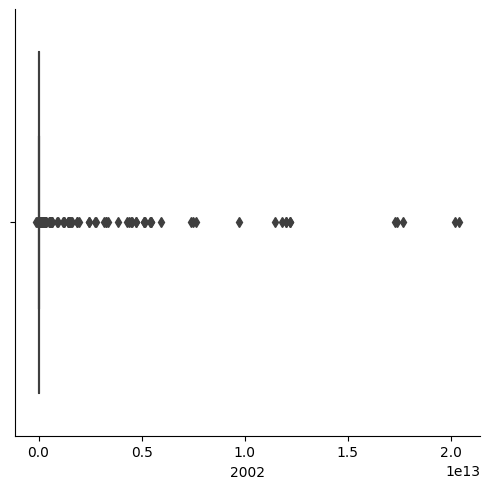

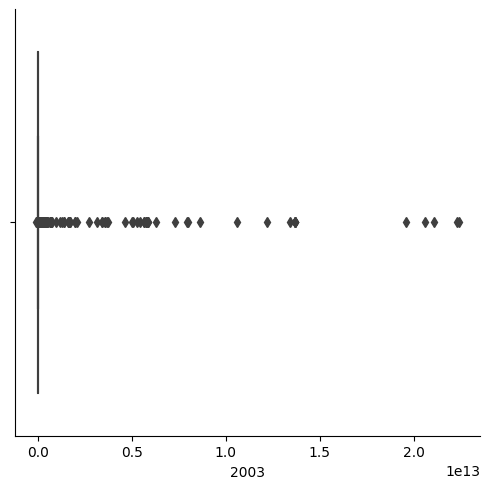

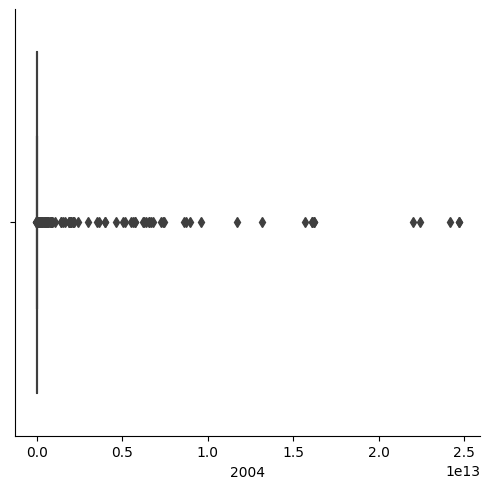

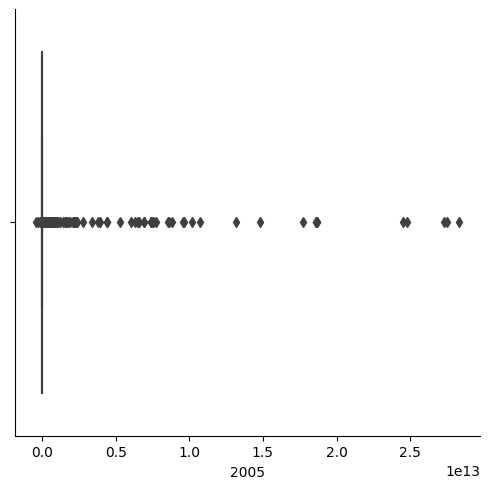

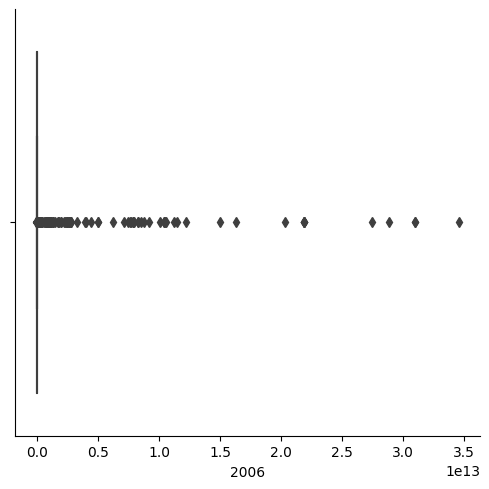

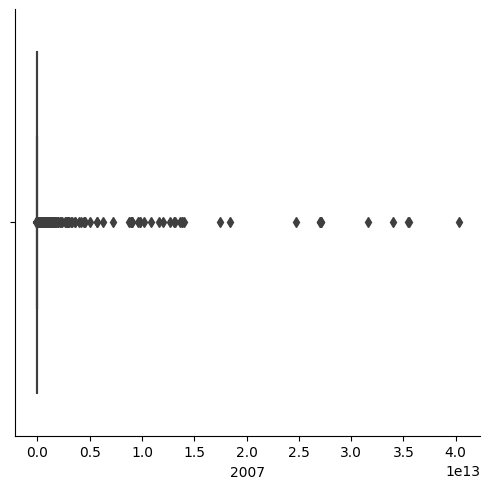

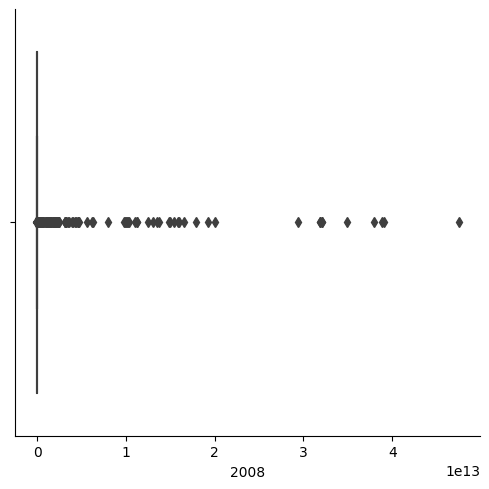

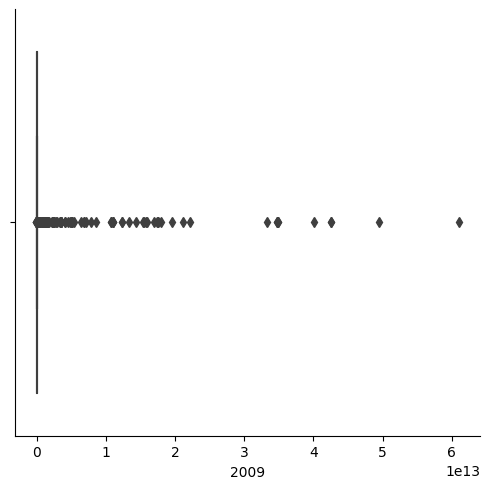

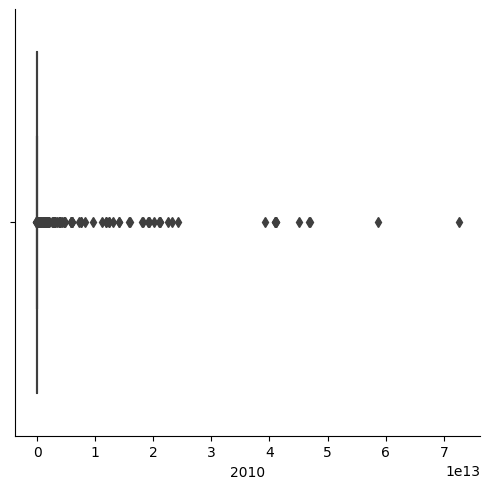

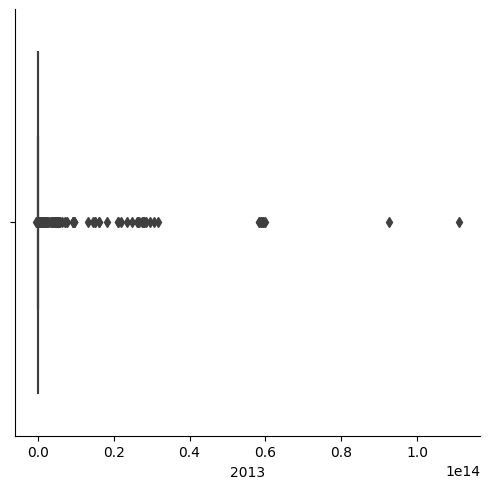

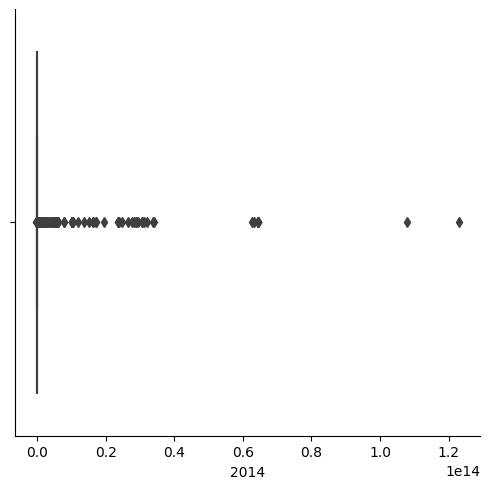

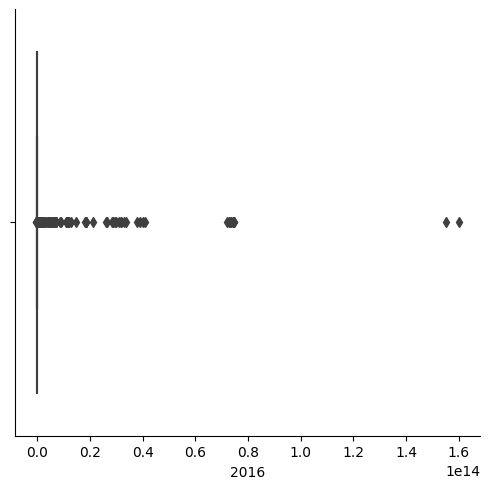

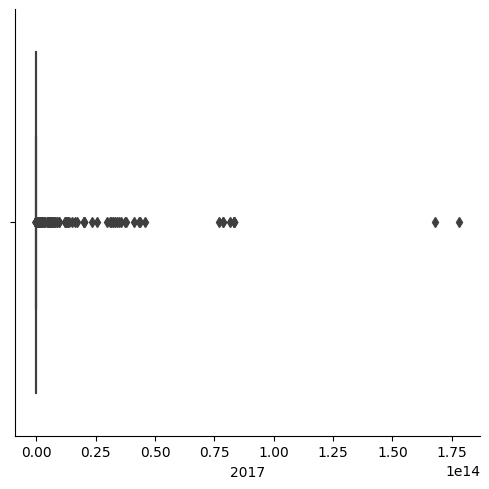

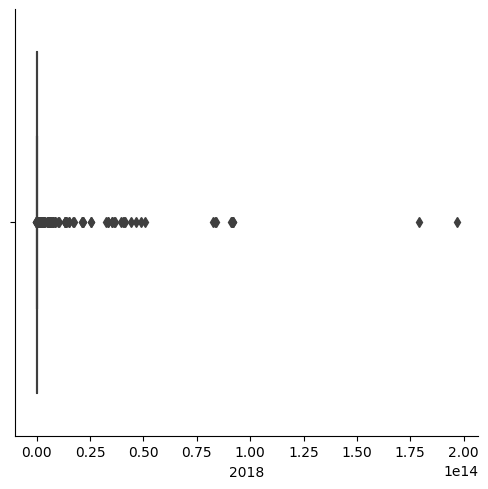

In [33]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

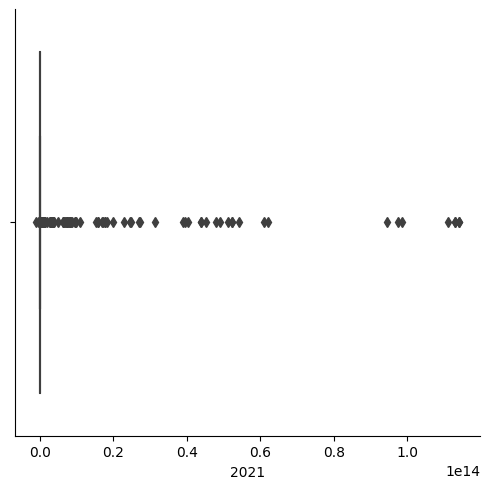

In [34]:
#for target variable
sns.catplot(data=df, x='2021', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



# 5. Scatter Plot

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.

In [35]:
import plotly.express as px
for value in features:
    figure = px.scatter(data_frame= df,x = value,y = '2021',trendline = 'ols')
    
    figure.show()

The line between both th variables is called Best Fir Line.The least Sum of Squares of Errors is used as the cost function for Linear Regression. For all possible lines, calculate the sum of squares of errors. The line which has the least sum of squares of errors is the best fit line.The line drawn in a scatter plot, which is near to almost all the points in the plot is known as “line of best fit” or “trend line“.

### Scatter Plot insight:

We can observe that various variables like carwidth,curbweight,etc shows continous increase in price. Which relates that these variables are highly correlated with the target variables.

### Why use Scatter plot?

Scatter plots are used in either of the following situations.

When we have paired numerical data
When there are multiple values of the dependent variable for a unique value of an independent variable
In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on.

### The GDP of a country tends to increase when the total value of goods and services that domestic producers sell to foreign countries exceeds the total value of foreign goods and services that domestic consumers buy. When this situation occurs, a country is said to have a trade surplus.

In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [338]:
# Separate target and feature column in X and y variable

target = '2021'
# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

y have target variable and X have all other variable.

#### Here in china GDP estimation, 2021 is the target variable.

In [339]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    1147 non-null   float64
 1   2001    1147 non-null   float64
 2   2002    1147 non-null   float64
 3   2003    1147 non-null   float64
 4   2004    1147 non-null   float64
 5   2005    1147 non-null   float64
 6   2006    1147 non-null   float64
 7   2007    1147 non-null   float64
 8   2008    1147 non-null   float64
 9   2009    1147 non-null   float64
 10  2010    1147 non-null   float64
 11  2011    1147 non-null   float64
 12  2012    1147 non-null   float64
 13  2013    1147 non-null   float64
 14  2014    1147 non-null   float64
 15  2015    1147 non-null   float64
 16  2016    1147 non-null   float64
 17  2017    1147 non-null   float64
 18  2018    1147 non-null   float64
 19  2019    1147 non-null   float64
 20  2020    1147 non-null   float64
dtypes: float64(21)
memory usage: 188.3 KB

In [340]:
y

0       2.995781e+01
1       1.510659e+12
2       1.510659e+12
3       1.510659e+12
4       3.360000e+12
            ...     
1142    1.510659e+12
1143    1.510659e+12
1144    1.510659e+12
1145    1.510659e+12
1146    1.510659e+12
Name: 2021, Length: 1147, dtype: float64

In [341]:
# Check the shape of X and y variable
X.shape, y.shape

((1147, 21), (1147,))

In [342]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [343]:
# Again check the shape of X and y variable
X.shape, y.shape

((1147, 21), (1147, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [344]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [345]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((917, 21), (230, 21), (917, 1), (230, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is not discrete format so we have to apply regression algorithm. In our dataset we have the outcome variable or Dependent variable i.e Y having non discrete values. So we will use Regression algorithm.

__Algorithms we are going to use in this step__

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. RandomForestRegressor

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [346]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables.

#### Train set cross-validation 

In [347]:
#Using Linear Regression Algorithm to the Training Set
from sklearn.linear_model import LinearRegression

li_R = LinearRegression() #Object Creation

li_R.fit(X_train, y_train)

LinearRegression()

In [348]:
#Accuracy check of trainig data

#Get R2 score
li_R.score(X_train, y_train)


0.8678651742934718

In [349]:
#Accuracy of test data
li_R.score(X_test, y_test) 

0.7584707489484173

In [350]:
# Getting kfold values
li_scores = -1 * cross_val_score(li_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
li_scores

array([2.78459596e+12, 5.05583163e+12, 5.44009314e+12, 3.49625717e+12,
       4.39666992e+12, 3.60670906e+12, 7.04152406e+12, 3.94044876e+12,
       2.41844192e+12, 2.82870228e+12])

In [351]:
# Mean of the train kfold scores
li_score_train = np.mean(li_scores)
li_score_train

4100927389346.216

### Prediction 

Now we will perform prediction on the dataset using Linear Regression.

In [352]:
# Predict the values on X_test_scaled dataset 
y_predicted = li_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

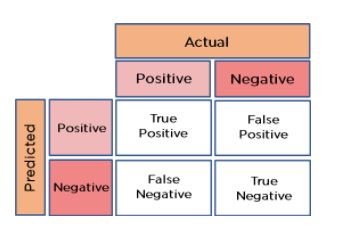

#### This diagram helps in understanding the concept of confusion matrix. 

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [353]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import r2_score  

li_acc = r2_score(y_test, y_predicted)*100
print("The model used is Linear Regression")
print("R2 Score is: -")
print()
print(li_acc)

The model used is Linear Regression
R2 Score is: -

75.84707489484173


# 2. Lasso Regression

Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

In [354]:
#Using Lasso Regression
from sklearn import linear_model
la_R = linear_model.Lasso(alpha=0.1)

In [355]:
#looking for training data
la_R.fit(X_train,y_train)

Lasso(alpha=0.1)

In [356]:
#Accuracy check of trainig data
la_R.score(X_train, y_train)

0.8497104168177774

In [357]:
# Getting kfold values
la_scores = -1 * cross_val_score(la_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
la_scores

array([3.44616989e+12, 5.97634961e+12, 4.87129556e+12, 4.32134069e+12,
       4.04496269e+12, 4.15798144e+12, 7.88456659e+12, 4.24234282e+12,
       2.87403086e+12, 2.66452878e+12])

In [358]:
# Mean of the train kfold scores
la_score_train = np.mean(la_scores)
la_score_train

4448356892438.363

### Prediction

Now we will perform prediction on the dataset using Lasso Regression.

In [359]:
# Predict the values on X_test_scaled dataset 
y_predicted=la_R.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [360]:
#Accuracy check of test data
la_acc = r2_score(y_test,y_predicted)*100
print("The model used is Lasso Regression")
print("R2 Score is: -")
print()
print(la_acc)

The model used is Lasso Regression
R2 Score is: -

66.1475635174258


# 3. Ridge Regression

Ridge regression is used when there are multiple variables that are highly correlated. It helps to prevent overfitting by penalizing the coefficients of the variables. Ridge regression reduces the overfitting by adding a penalty term to the error function that shrinks the size of the coefficients.

In [361]:
#Using Ridge Regression
from sklearn.linear_model import Ridge
ri_R = Ridge(alpha=1.0)

In [362]:
#looking for training data
ri_R.fit(X_train,y_train)

Ridge()

In [363]:
#Accuracy check of trainig data
ri_R.score(X_train, y_train)

0.8678651742934718

In [364]:
# Getting kfold values
ri_scores = -1 * cross_val_score(ri_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
ri_scores

array([2.78459596e+12, 5.05583163e+12, 5.44009314e+12, 3.49625717e+12,
       4.39666992e+12, 3.60670906e+12, 7.04152406e+12, 3.94044876e+12,
       2.41844192e+12, 2.82870228e+12])

In [365]:
# Mean of the train kfold scores
ri_score_train = np.mean(ri_scores)
ri_score_train

4100927389346.3804

### Prediction

Now we will perform prediction on the dataset using Ridge Regression.

In [366]:
# Predict the values on X_test_scaled dataset 

y_predicted=ri_R.predict(X_test)

### Evaluating all kinds of evaluating parameters. 

In [367]:
#Accuracy check of test data
ri_acc = r2_score(y_test,y_predicted)*100
print("The model used is Ridge Regression")
print("R2 Score is: -")
print()
print(ri_acc)

The model used is Ridge Regression
R2 Score is: -

75.84707489485069


# 4. RandomForestRegressor

Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.

In [368]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.ensemble import RandomForestRegressor

rr_R = RandomForestRegressor() #Object Creation

rr_R.fit(X_train, y_train)

RandomForestRegressor()

In [369]:
#Accuracy check of trainig data

#Get R2 score
rr_R.score(X_train, y_train)


0.9867474338446556

In [370]:
#Accuracy of test data
rr_R.score(X_test, y_test) 

0.9527967023605731

### Prediction

Now we will perform prediction on the dataset using Random Forest Regressor.

In [371]:
# Predict the values on X_test_scaled dataset 
y_predicted = rr_R.predict(X_test)

In [372]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything

print("The model used is RandomForestRegressor")

rr_acc = r2_score(y_test, y_predicted)*100
print("R2 Score is: -")
print()
print(rr_acc)


The model used is RandomForestRegressor
R2 Score is: -

95.27967023605731


# Insight: -

In [373]:
cal_metric=pd.DataFrame([li_acc,la_acc,ri_acc,rr_acc],columns=["Score in percentage"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression',
                  'Ridge Regression',
                  'Random Forest Regressor']
cal_metric

Score in percentage
Linear Regression                  75.847075
Lasso Regression                   66.147564
Ridge Regression                   75.847075
Random Forest Regressor            95.279670

- As you can see with our Random Forest Regressor(0.9527 or 95.27%) we are getting a better result.
- So we gonna save our model with Random Forest Regressor Algorithm.

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [374]:
import pickle
pickle.dump(li_R , open('china_gdp_estimate_li.pkl', 'wb'))
pickle.dump(la_R , open('china_gdp_estimate_la.pkl', 'wb'))
pickle.dump(ri_R , open('china_gdp_estimate_ri.pkl', 'wb'))
pickle.dump(rr_R , open('china_gdp_estimate_rr.pkl', 'wb'))

In [375]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('china_gdp_estimate_rr.pkl', 'rb'))
    ch = str(pickled_model.predict(features)[0])
    
    return str(f'The china estimate GDP is {ch}')

#### We can test our model by giving our own parameters or features to predict. 

In [376]:
Y_2000 = 1510658920328.1545
Y_2001 = 1510658920328.1545
Y_2002 = 1510658920328.1545
Y_2003 = 1510658920328.1545
Y_2004 = 1510658920328.1545
Y_2005 = 1510658920328.1545
Y_2006 = 1510658920328.1545
Y_2007 = 1510658920328.1545
Y_2008 = 1510658920328.1545
Y_2009 = 1510658920328.1545
Y_2010 = 1510658920328.1545
Y_2011 = 1510658920328.1545
Y_2012 = 1510658920328.1545
Y_2013 = 1510658920328.1545
Y_2014 = 84.57353
Y_2015 = 84.57353
Y_2016 = 84.57353
Y_2017 = 84.57353
Y_2018 = 73.57353
Y_2019 = 73.57353
Y_2020 = 1510658920328.1545

In [377]:
model_prediction([[Y_2000, Y_2001, Y_2002, Y_2003, Y_2004, Y_2005, Y_2006, Y_2007, Y_2008, Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020]])

'The china estimate GDP is 1510658920328.156'

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to solve the problem. The above model helps in predicting the estimate GDP of china. The accuracy for the prediction is 95.27%.